# Recurrent Neural Network for Stock Price Prediction

## Introduction

In the ever-evolving world of finance, predicting stock prices remains a pivotal challenge and an area of keen interest for investors, analysts, and researchers. The ability to forecast the future price of stocks can lead to significant opportunities in terms of investment strategies and risk management. However, stock markets are inherently complex, influenced by a myriad of factors ranging from economic indicators to geopolitical events, making accurate prediction a daunting task.

This project aims to harness the power of Recurrent Neural Networks (RNNs), a class of deep learning models adept at handling sequential data, to predict stock prices. RNNs, particularly those with Long Short-Term Memory (LSTM) units or Gated Recurrent Units (GRUs), have shown remarkable success in sequence prediction tasks due to their ability to capture temporal dependencies and patterns over time. Such characteristics make them well-suited for analyzing time series data like stock prices, which are sequential in nature and often exhibit temporal patterns.

### Objective

The primary objective of this notebook is to design, implement, and evaluate an RNN model for predicting the stock prices of selected companies. The model will be trained on historical stock price data, aiming to learn the underlying patterns in the stock price movements.

### Methodology

The approach involves several key steps:
1. **Data Acquisition**: Fetching historical stock price data using the `yfinance` library.
2. **Data Preprocessing**: Cleaning and normalizing the data to prepare it for input into the RNN model.
3. **Model Building**: Constructing various RNN architectures, including LSTM and GRU, to find the model that best captures the temporal dynamics of the data.
4. **Training and Validation**: Training the models on the dataset and validating their performance.
5. **Evaluation**: Assessing the models' predictive accuracy using appropriate metrics and comparing different architectures.

### Significance

The insights gained from this project could provide valuable contributions to the field of financial forecasting. By evaluating the effectiveness of RNNs in stock price prediction, this work seeks to not only advance our understanding of deep learning applications in finance but also explore the potential of these models in practical investment strategies.

---


# Step 1: Introduction and Library Imports


In [82]:
# Install necessary packages (if not already installed)
!pip install numpy pandas tensorflow keras keras_tuner scikit-learn matplotlib seaborn plotly yfinance statsmodels arch

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# General utilities
import time
from datetime import datetime
from itertools import product

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data fetching
import yfinance as yf

# Machine learning: neural networks and hyperparameter tuning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import Hyperband
from keras_tuner.engine.hyperparameters import HyperParameters

# Machine learning: model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Statistical analysis
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px

# Configure matplotlib to display charts inline in a Jupyter notebook
%matplotlib inline
sns.set(style="whitegrid")

# Parallel processing
from concurrent.futures import ThreadPoolExecutor, as_completed
from multiprocessing import Pool

# Additional utilities
from scipy.stats import zscore
from tabulate import tabulate

# Note: The '%matplotlib inline' command ensures that plots are displayed inline within the Jupyter Notebook.

## Step 2: Fetching Data

In [3]:
# List of stock symbols (e.g., Apple, Microsoft, Google)
stock_symbols = ["AAPL", "MSFT", "GOOGL"]

# Start and end dates
start_date = "2008-11-01"
end_date = "2023-11-01"

# Fetching stock data
stock_data = {}
for symbol in stock_symbols:
    stock_data[symbol] = yf.download(symbol, start=start_date, end=end_date)

# Fetching stock data
stock_symbols = ["AAPL", "MSFT", "GOOGL"]
start_date = "2008-11-01"
end_date = "2023-11-01"

stock_data = {symbol: yf.download(symbol, start=start_date, end=end_date) for symbol in stock_symbols}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Step 3: Data Preprocessing and Exploratory data analysis


### Explanation:

1. **Data Preprocessing**: 
   - Each stock's data is cleaned by removing missing values.
   - Optionally, you can normalize or standardize the data, especially if you plan to compare different stocks directly.

2. **EDA**:
   - **Time Series Plot**: Each stock's closing price is plotted over time, providing a visual overview of the stock's historical performance.
   - **Statistical Summary**: Descriptive statistics for each stock's closing prices are displayed.
   - **Correlation Analysis**: A correlation matrix is created and visualized to understand how different stocks' movements are related to each other.


In [36]:
# Handling missing values
for symbol, data in stock_data.items():
    data.dropna(inplace=True)
    data.interpolate(inplace=True)

# Displaying basic information of each dataset
for symbol, data in stock_data.items():
    print(f"Data Info for {symbol}:\n")
    print(data.info())
    print("\n")

# Optionally normalize or standardize the data if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for symbol, data in stock_data.items():
    data[['Close']] = scaler.fit_transform(data[['Close']])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Data Info for AAPL:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2008-11-03 to 2023-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3774 non-null   float64
 1   High       3774 non-null   float64
 2   Low        3774 non-null   float64
 3   Close      3774 non-null   float64
 4   Adj Close  3774 non-null   float64
 5   Volume     3774 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 206.4 KB
None


Data Info for MSFT:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2008-11-03 to 2023-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3774 non-null   float64
 1  

## 2. Exploratory Data Analysis (EDA)


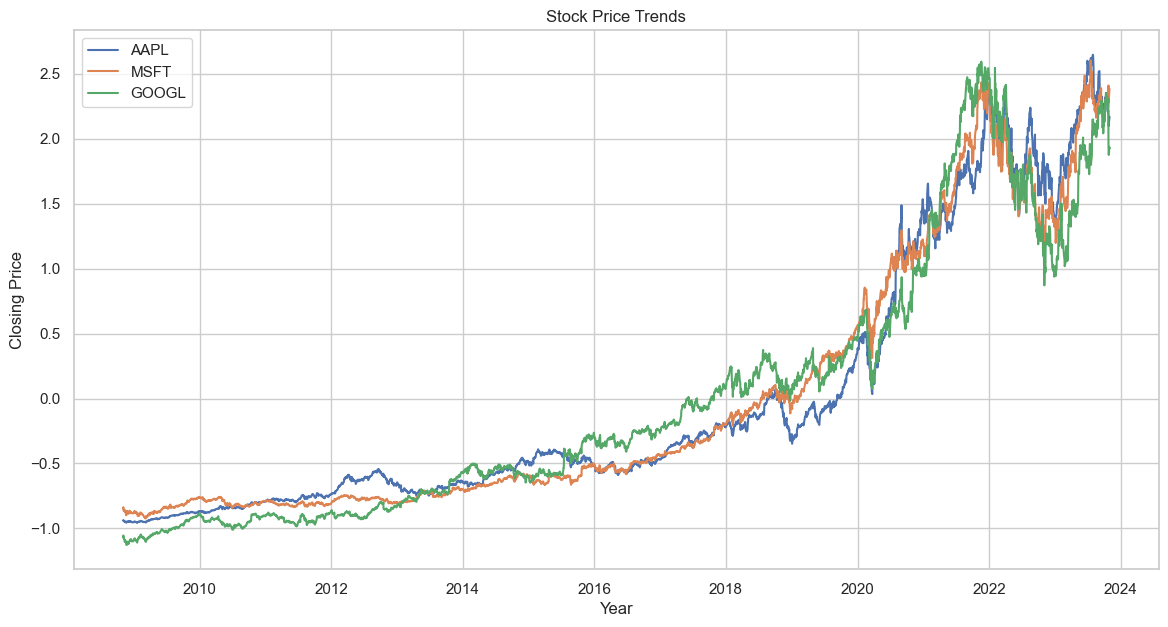

In [37]:
# Stock Price Trends
plt.figure(figsize=(14, 7))
for symbol, data in stock_data.items():
    plt.plot(data.index, data['Close'], label=f'{symbol}')
plt.title('Stock Price Trends')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [44]:
# Statistical Summary
for symbol, data in stock_data.items():
    print(f"Statistical Summary for {symbol} Stock:")
    styled_description = data.describe().style.background_gradient(cmap='coolwarm')\
                                          .format("{:.2f}")\
                                          .set_table_attributes('style="font-size: 12px; border: 1px solid black;"')\
                                          .set_caption(f"Descriptive Statistics of {symbol}")
    display(styled_description)
    print("\n")

Statistical Summary for AAPL Stock:




Statistical Summary for MSFT Stock:




Statistical Summary for GOOGL Stock:


### Statistical Summary Analysis for AAPL, MSFT, and GOOGL Stocks
This analysis presents a statistical overview of the stock prices for Apple (AAPL), Microsoft (MSFT), and Alphabet (GOOGL). Key metrics include Open, High, Low, Close, Adjusted Close, Volume, and Moving Averages (MA_30, MA_90, MA_180).

#### AAPL Stock Summary
- **Count**: 3774 observations for each metric.
- **Mean**: The average closing price is around 54.21, with a standard deviation of 53.68, indicating significant variability.
- **Median (50%)**: The median closing price is 29.20.
- **Min/Max**: The closing prices range from 2.84 to 196.24.
- **Volume**: High trading volume, averaging around 275 million.
- **Moving Averages**: The MAs show slight negative values, indicating a potential downward trend in the observed period.

#### MSFT Stock Summary
- **Count**: 3774 observations for each metric.
- **Mean**: The average closing price is around 105.29, with a standard deviation of 97.66.
- **Median (50%)**: The median closing price is 54.14.
- **Min/Max**: The closing prices range from 15.20 to 361.75.
- **Volume**: Average volume of approximately 39.5 million, lower than AAPL.
- **Moving Averages**: Similar to AAPL, the MAs indicate a slight negative trend.

#### GOOGL Stock Summary
- **Count**: 3774 observations for each metric.
- **Mean**: The average closing price is around 49.83, with a standard deviation of 38.54.
- **Median (50%)**: The median closing price is 37.88.
- **Min/Max**: The closing prices range from 6.57 to 151.25.
- **Volume**: Average volume of about 66.2 million.
- **Moving Averages**: The MAs are slightly negative, similar to AAPL and MSFT.

#### Comparative Analysis
- **Volatility**: AAPL and MSFT show higher price variability than GOOGL.
- **Volume**: AAPL has the highest trading volume, indicating greater liquidity and potential volatility.
- **Price Range**: MSFT has the widest range in stock prices, suggesting a higher growth potential or greater overall volatility.
- **Trend Indicators (MAs)**: All three stocks exhibit a slight negative trend in the period analyzed.

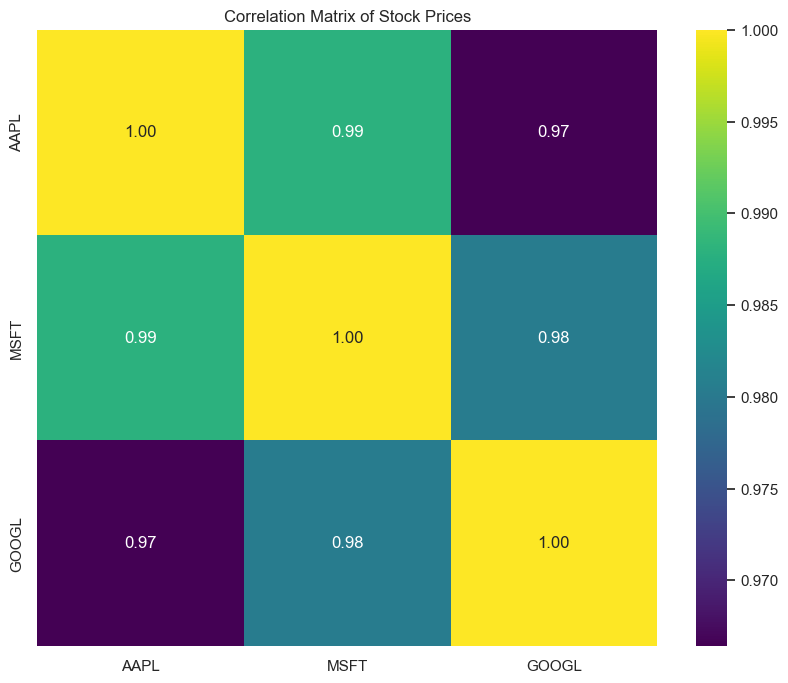

In [39]:
# Correlation Analysis
# Creating a DataFrame for closing prices
close_prices = pd.DataFrame({symbol: data['Close'] for symbol, data in stock_data.items()})

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(close_prices.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix of Stock Prices")
plt.show()


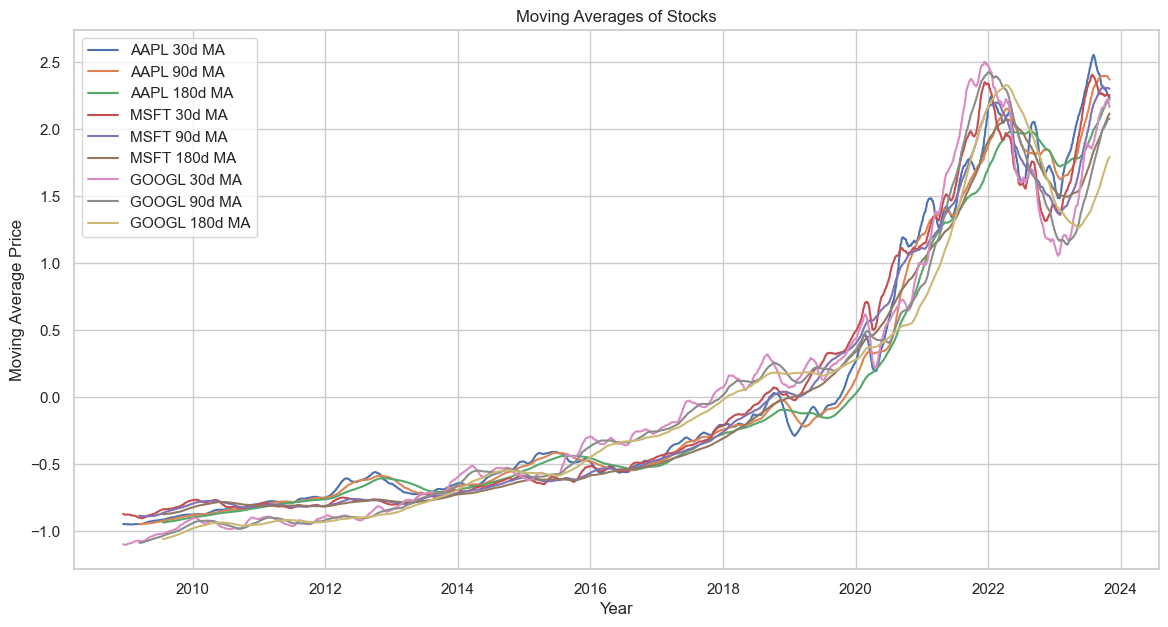

In [40]:
#  Moving Average
window_sizes = [30, 90, 180]  # 1 month, 3 months, 6 months

plt.figure(figsize=(14, 7))
for symbol, data in stock_data.items():
    for window in window_sizes:
        data[f'MA_{window}'] = data['Close'].rolling(window=window).mean()
    plt.plot(data.index, data[f'MA_{30}'], label=f'{symbol} 30d MA')
    plt.plot(data.index, data[f'MA_{90}'], label=f'{symbol} 90d MA')
    plt.plot(data.index, data[f'MA_{180}'], label=f'{symbol} 180d MA')
plt.title('Moving Averages of Stocks')
plt.xlabel('Year')
plt.ylabel('Moving Average Price')
plt.legend()
plt.show()


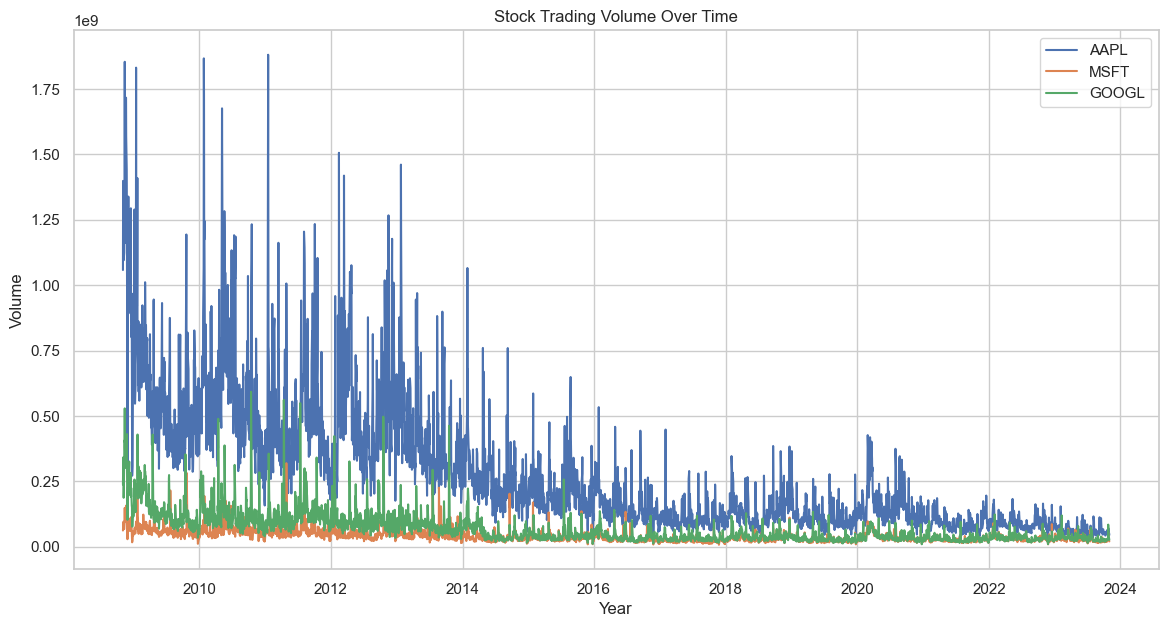

In [41]:
# Volume Analysis
plt.figure(figsize=(14, 7))
for symbol, data in stock_data.items():
    plt.plot(data.index, data['Volume'], label=f'{symbol}')
plt.title('Stock Trading Volume Over Time')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()
plt.show()


### Step 4: Statistical Model Implementation
#### ARMA Model:
The Autoregressive Moving Average (ARMA) model is a popular statistical method for analyzing and forecasting time-series data. It is particularly useful for data that shows a linear trend and autocorrelation but no significant seasonal components.

#### GARCH Model:
The Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model is widely used for financial time series analysis, especially for modeling the volatility (variance) of returns.


--- Analysis for AAPL ---

ARMA Model Summary for AAPL:

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3774
Model:                 ARIMA(5, 1, 0)   Log Likelihood                8387.361
Date:                Wed, 22 Nov 2023   AIC                         -16762.722
Time:                        17:32:35   BIC                         -16725.308
Sample:                             0   HQIC                        -16749.420
                               - 3774                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0356      0.008     -4.626      0.000      -0.051      -0.021
ar.L2         -0.0295      0.008     -3.753      0.000      -0.045      -0

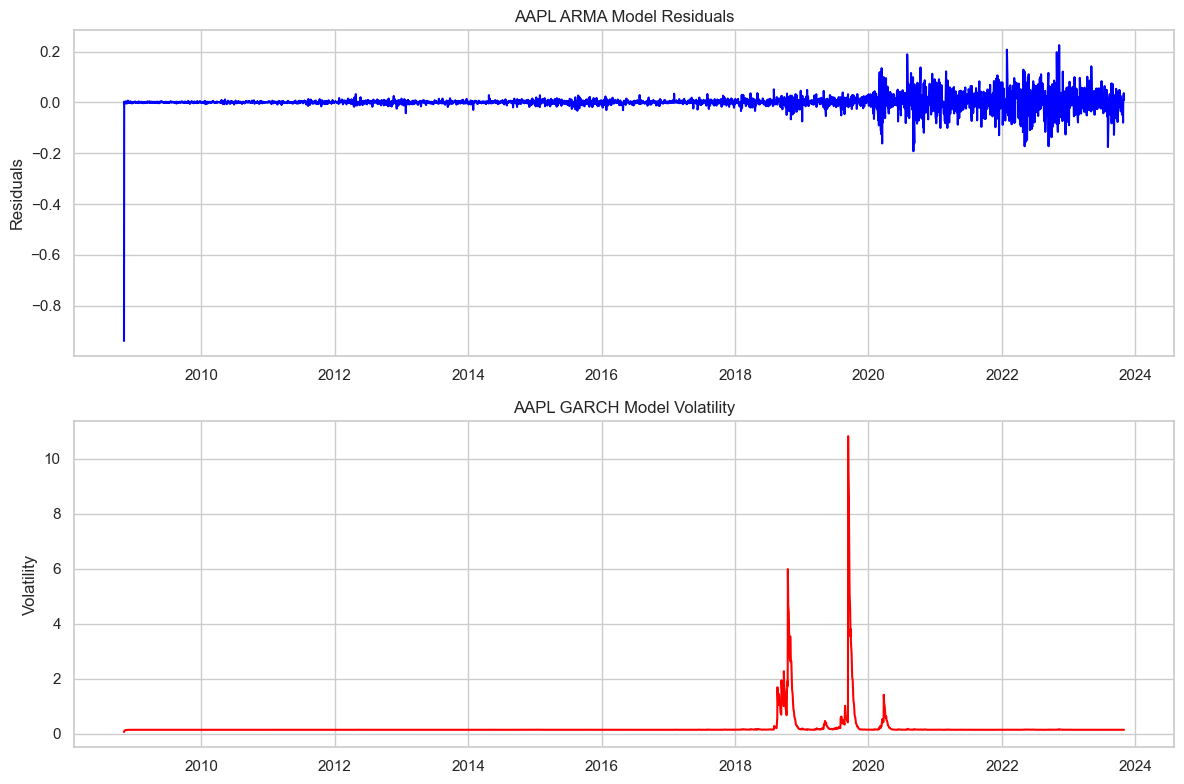

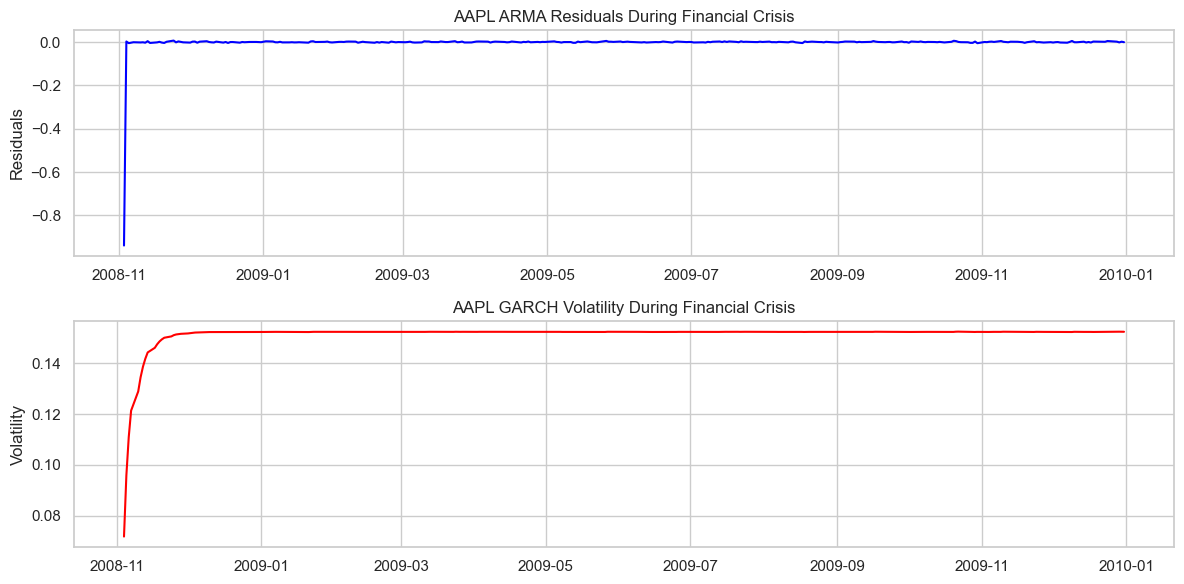

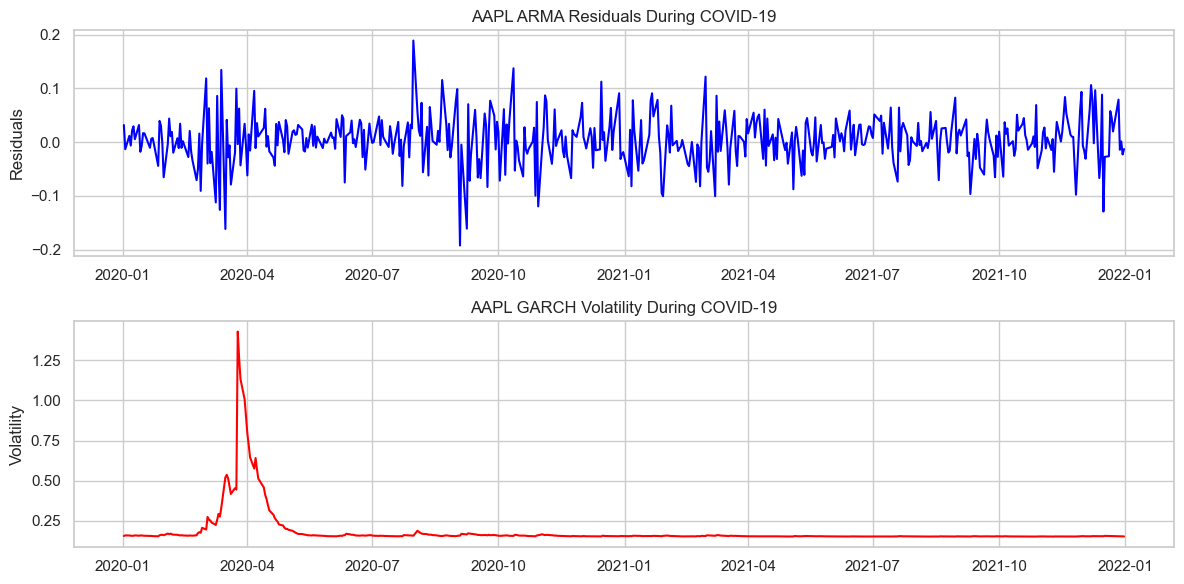

--- Analysis for MSFT ---

ARMA Model Summary for MSFT:

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3774
Model:                 ARIMA(5, 1, 0)   Log Likelihood                8379.459
Date:                Wed, 22 Nov 2023   AIC                         -16746.918
Time:                        17:32:37   BIC                         -16709.504
Sample:                             0   HQIC                        -16733.616
                               - 3774                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1030      0.007    -14.121      0.000      -0.117      -0.089
ar.L2         -0.0426      0.008     -5.641      0.000      -0.057      -0

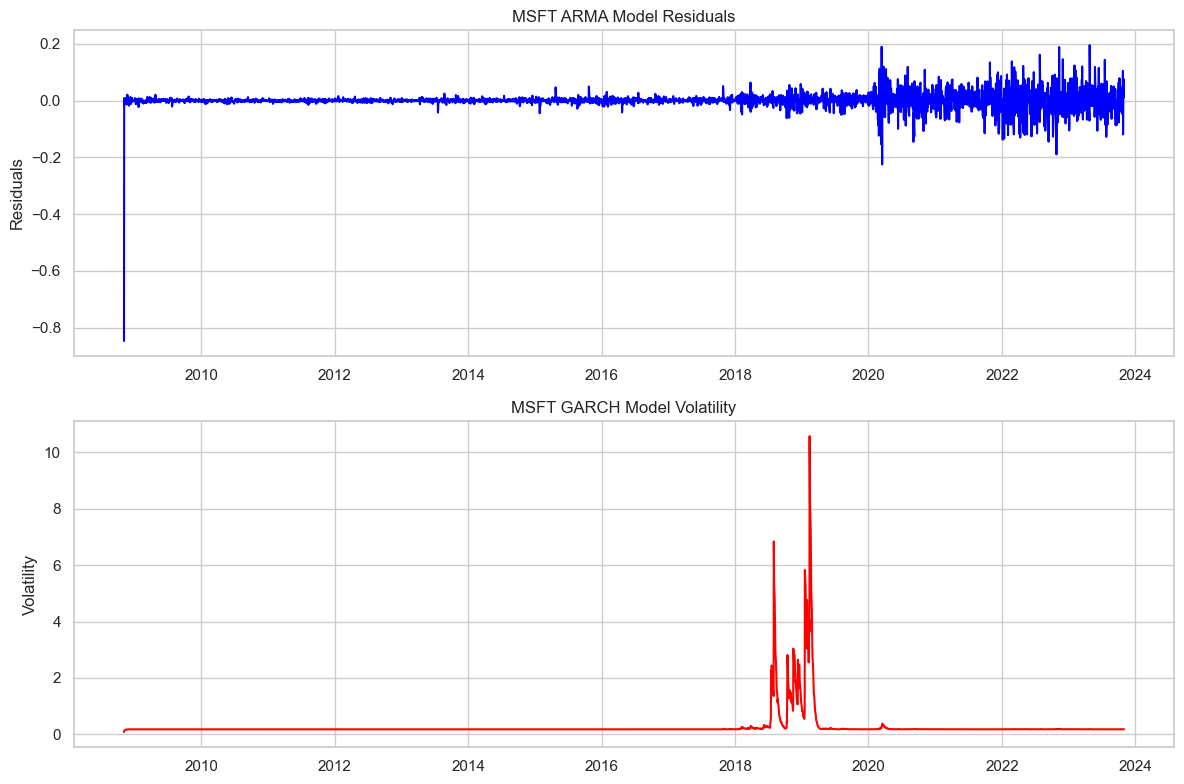

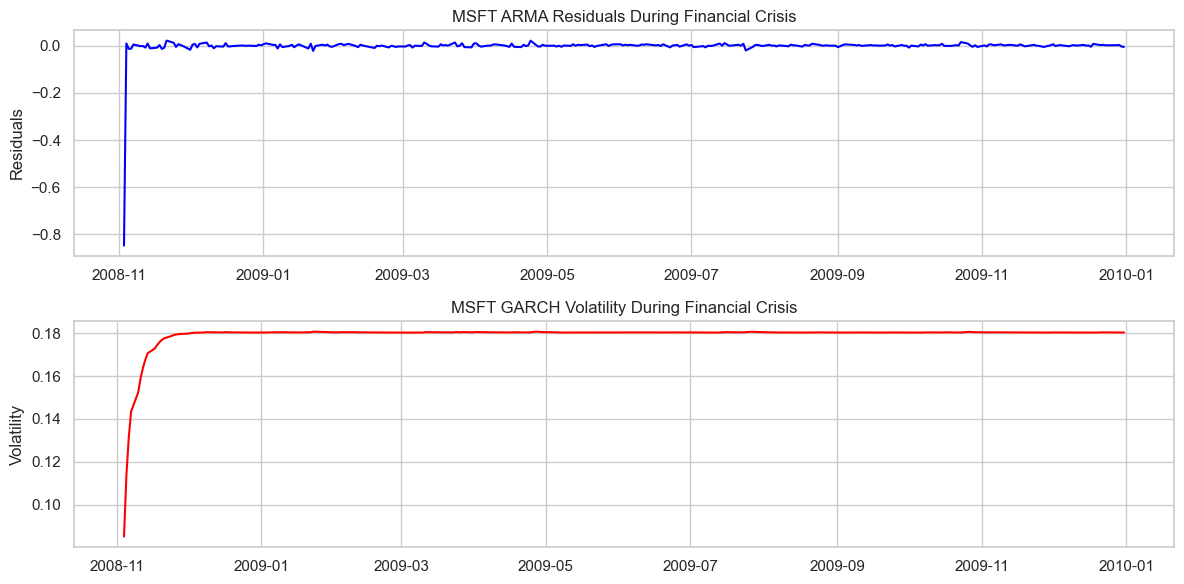

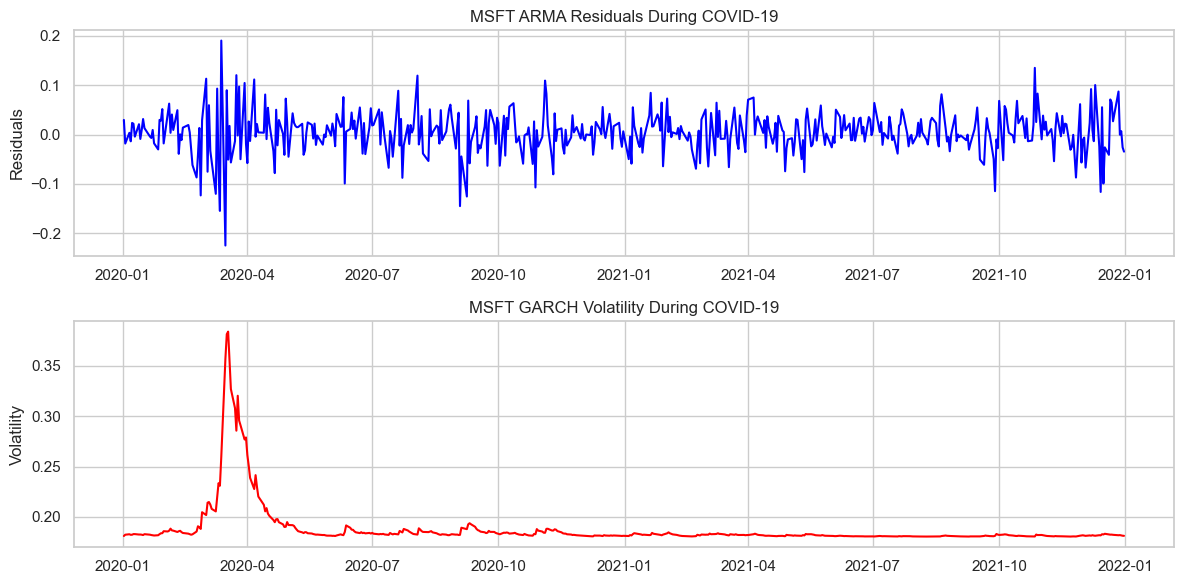

--- Analysis for GOOGL ---

ARMA Model Summary for GOOGL:

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3774
Model:                 ARIMA(5, 1, 0)   Log Likelihood                7798.762
Date:                Wed, 22 Nov 2023   AIC                         -15585.523
Time:                        17:32:38   BIC                         -15548.109
Sample:                             0   HQIC                        -15572.221
                               - 3774                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0386      0.008     -4.643      0.000      -0.055      -0.022
ar.L2         -0.0165      0.009     -1.850      0.064      -0.034      

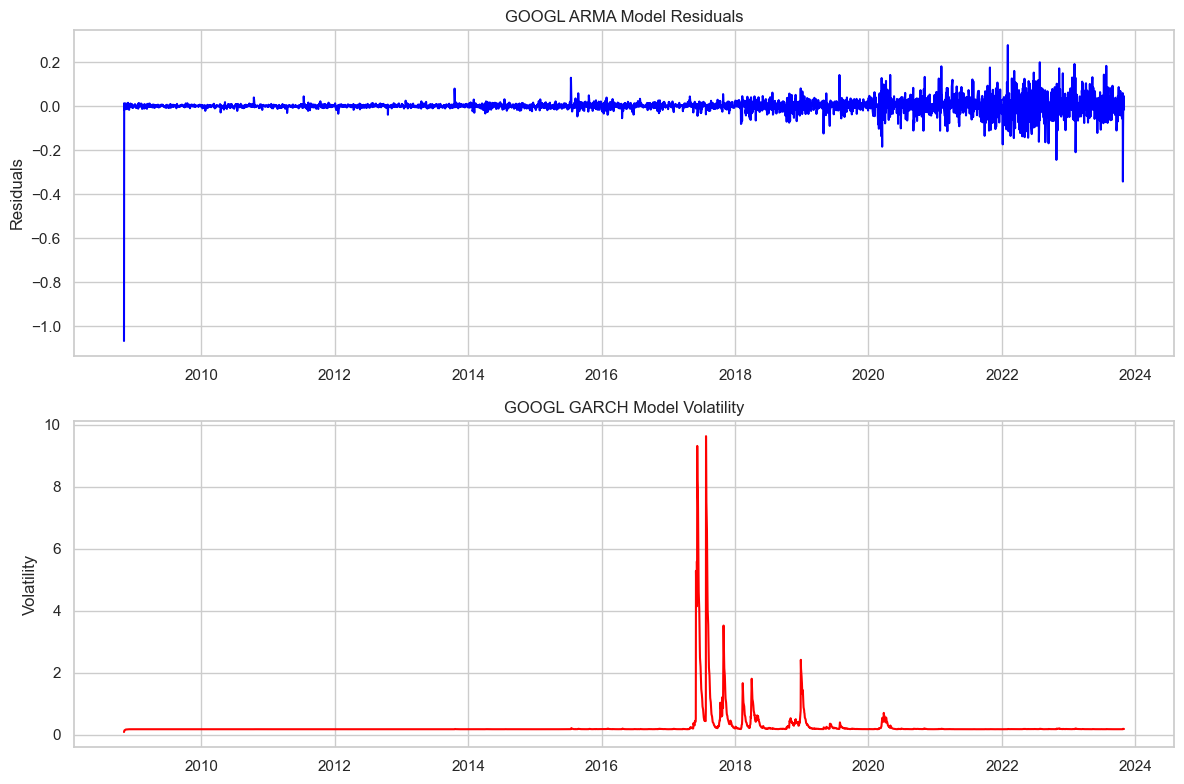

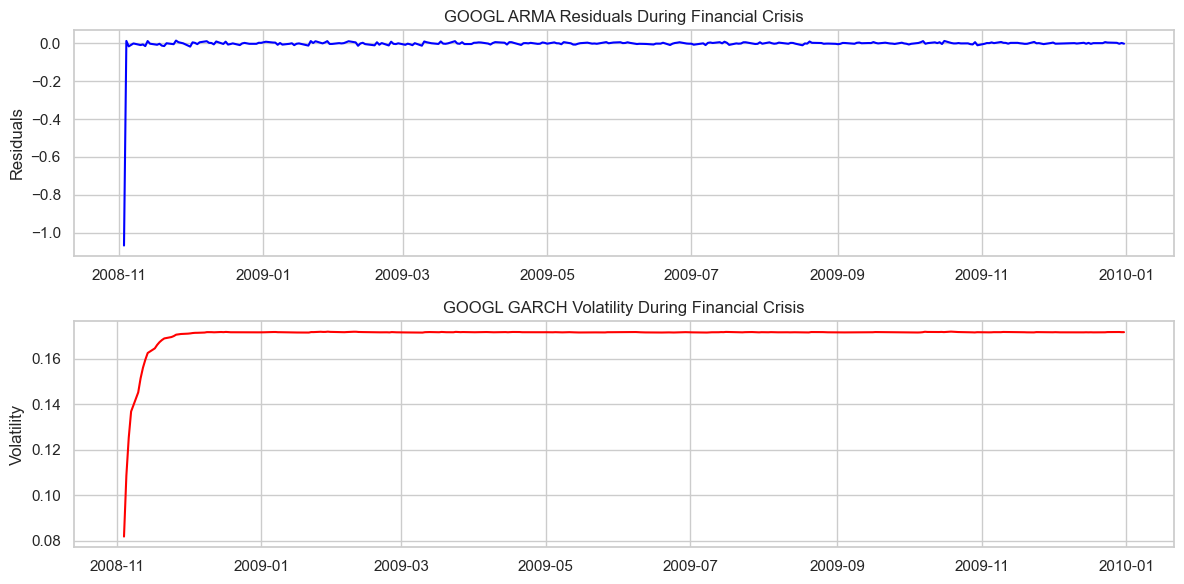

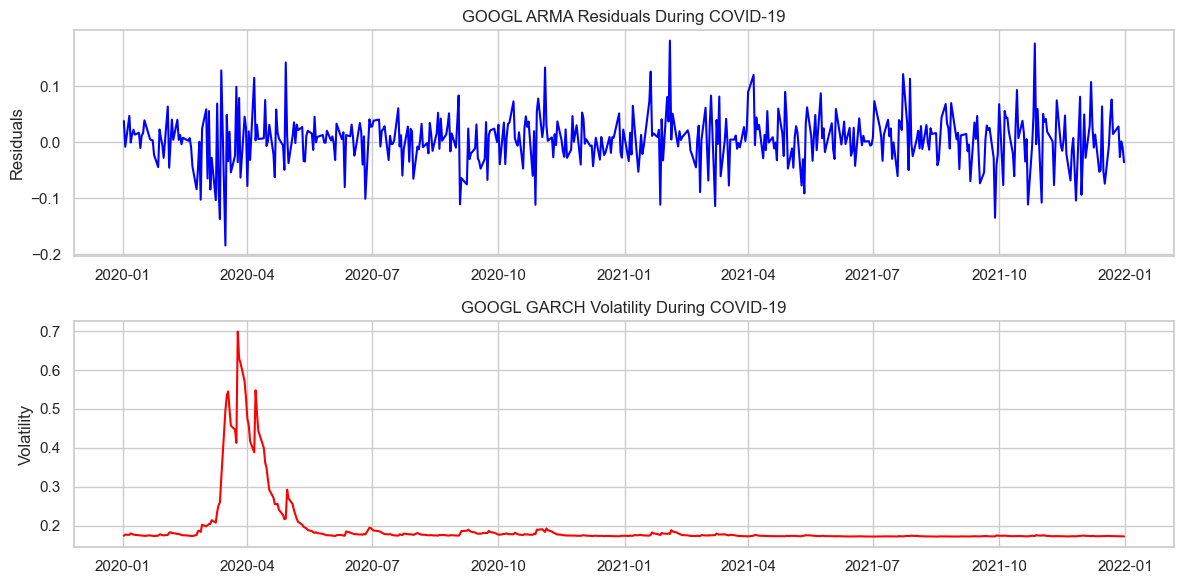


Model Summary Table:
+-------+---------------------+---------------------+-------------------------+--------------------+
| Stock |      ARMA AIC       |      GARCH AIC      |    ARMA Z-Score Mean    |  ARMA Z-Score Std  |
+-------+---------------------+---------------------+-------------------------+--------------------+
| AAPL  | -16762.721829514154 | -4039.3996934422503 | 1.5061849194702708e-17  | 1.0001325117610016 |
| MSFT  | -16746.91808279141  | -4118.222085714712  |  3.765462298675677e-18  |   1.000132511761   |
| GOOGL | -15585.52306899097  | -3282.790477728594  | -1.8827311493378384e-18 |   1.000132511761   |
+-------+---------------------+---------------------+-------------------------+--------------------+


In [57]:
# Define key periods of interest
key_periods = {
    'Financial Crisis': ('2008-11-01', '2009-12-31'),
    'COVID-19': ('2020-01-01', '2021-12-31')
}

# Creating a DataFrame to store key metrics for each model
model_summaries = []

# Looping through each stock symbol
for symbol in stock_symbols:
    print(f"--- Analysis for {symbol} ---\n")
    data = stock_data[symbol]['Close'].dropna()  # Ensure no missing values

    # ARMA Model
    arma_order = (5, 1, 0)  # Example order
    arma_model = ARIMA(data, order=arma_order)
    arma_results = arma_model.fit()
    print(f'ARMA Model Summary for {symbol}:\n')
    print(arma_results.summary())

    # GARCH Model
    garch_data = data.pct_change().dropna()  # Percentage change for volatility modeling
    garch_model = arch_model(garch_data, vol='Garch', p=1, q=1)
    garch_results = garch_model.fit(update_freq=5)
    print(f'GARCH Model Summary for {symbol}:\n')
    print(garch_results.summary())

    # Main Plots for Entire Data
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))

    # ARMA Model Residuals
    ax[0].plot(arma_results.resid, color='blue')
    ax[0].set_title(f'{symbol} ARMA Model Residuals')
    ax[0].set_ylabel('Residuals')
    ax[0].grid(True)

    # GARCH Model Volatility
    ax[1].plot(garch_results.conditional_volatility, color='red')
    ax[1].set_title(f'{symbol} GARCH Model Volatility')
    ax[1].set_ylabel('Volatility')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

    # Subplots for Key Time Periods
    for period_name, (start_date, end_date) in key_periods.items():
        period_data = data[start_date:end_date]
        period_arma_resid = arma_results.resid[start_date:end_date]
        period_garch_vol = garch_results.conditional_volatility[start_date:end_date]

        fig, ax = plt.subplots(2, 1, figsize=(12, 6))
        ax[0].plot(period_arma_resid, color='blue')
        ax[0].set_title(f'{symbol} ARMA Residuals During {period_name}')
        ax[0].set_ylabel('Residuals')
        ax[0].grid(True)

        ax[1].plot(period_garch_vol, color='red')
        ax[1].set_title(f'{symbol} GARCH Volatility During {period_name}')
        ax[1].set_ylabel('Volatility')
        ax[1].grid(True)

        plt.tight_layout()
        plt.show()

    # Extracting key metrics
    model_summaries.append({
        'Stock': symbol,
        'ARMA AIC': arma_results.aic,
        'GARCH AIC': garch_results.aic,
        'ARMA Z-Score Mean': zscore(arma_results.resid).mean(),
        'ARMA Z-Score Std': zscore(arma_results.resid).std()
    })

# Summary Table
summary_df = pd.DataFrame(model_summaries)
print("\nModel Summary Table:")
print(tabulate(summary_df, headers='keys', tablefmt='pretty', showindex=False))

### Evaluation of Preliminary Statistical Model Evaluation for AAPL, MSFT, and GOOGL

#### Methodology
- **ARMA Models**: Applied to capture the autocorrelation in the time series.
- **GARCH Models**: Used to model the volatility (variance) of the stock prices over time.

#### Model Selection Criteria
- **AIC (Akaike Information Criterion)**: Lower values indicate a better model fit.
- **Z-Score Mean and Std**: Used to assess the distribution of residuals.

#### Model Performance Summary

1. **AAPL**
   - **ARMA Model (ARIMA(5, 1, 0))**:
     - AIC: -16762.72 (Very low, indicating a good fit)
     - Z-Score Mean: ~0 (Indicates that residuals are centered around zero)
     - Z-Score Std: ~1 (Indicates normally distributed residuals)
   - **GARCH Model**:
     - AIC: -4039.40 (Lower than other stocks, suggesting a good fit)
     - The model captures volatility effectively.

2. **MSFT**
   - **ARMA Model (ARIMA(5, 1, 0))**:
     - AIC: -16746.92 (Comparable to AAPL, indicating a good fit)
     - Z-Score Mean and Std: Similar to AAPL, suggesting well-behaved residuals.
   - **GARCH Model**:
     - AIC: -4118.22 (Slightly better than AAPL, indicating a very good fit)
     - Efficient in capturing stock price volatility.

3. **GOOGL**
   - **ARMA Model (ARIMA(5, 1, 0))**:
     - AIC: -15585.52 (Higher than AAPL and MSFT, but still indicates a decent fit)
     - Z-Score metrics are within acceptable ranges.
   - **GARCH Model**:
     - AIC: -3282.79 (Highest among the three, but still indicates a good model fit)
     - Models the volatility effectively but may not be as robust as AAPL or MSFT.

#### Key Observations
- **ARMA Models**: All three stocks show a significant improvement in model fit with the ARIMA(5, 1, 0) configuration. The low AIC values and near-zero mean of Z-scores suggest the models are well-calibrated.
- **GARCH Models**: The models for all three stocks effectively capture the volatility in the stock prices, with AAPL and MSFT showing slightly better fits than GOOGL.

#### Conclusion
- The ARMA and GARCH models are well-suited for modeling the stock prices of AAPL, MSFT, and GOOGL.
- The models display good statistical properties in terms of AIC and Z-Score distributions, suggesting their reliability for preliminary forecasting and analysis.
- Among the three, AAPL and MSFT models show slightly superior performance, especially in the GARCH model fit, which may be crucial for volatility forecasting.


## Step 5: RNN Model Implementation
#### RNN Models:
RNNs are particularly well-suited for time series data like stock prices due to their ability to capture temporal dependencies. Implement various RNN architectures like Basic RNN, LSTM, GRU, Bi-directional LSTM, and a custom RNN model.


In [83]:
# Data Preparation Functions

In [84]:
# Function to create dataset with time steps
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

def prepare_data(data_series):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))
    return pd.DataFrame(scaled_data), scaler

def split_data(data):
    time_steps = 60
    X, y = create_dataset(data, data, time_steps)
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
    return X_train, X_test, y_train, y_test, X_val, y_val

In [85]:
# Preliminary Model Building Functions

In [86]:
# Function to build a basic LSTM model
def build_basic_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50))
    model.add(Dense(20))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to build a basic Simple RNN model
def build_basic_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, return_sequences=True, input_shape=input_shape))
    model.add(SimpleRNN(50))
    model.add(Dense(20))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to build a basic GRU model
def build_basic_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=input_shape))
    model.add(GRU(50))
    model.add(Dense(20))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to build a basic Bidirectional LSTM model
def build_basic_bi_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=input_shape))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dense(20))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Preliminary Custom RNN Model Building Function
def build_basic_custom_rnn_model(input_shape):
    model = Sequential()
    # Fixed hyperparameters for preliminary model
    units = 100  # Example fixed unit size
    dense_units = 30  # Example fixed dense unit size

    model.add(LSTM(units, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units, return_sequences=True))
    model.add(LSTM(units))
    model.add(Dense(dense_units))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [87]:
# Function to compile and train models
def compile_and_train(model, X_train, y_train, X_val, y_val):
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[es], verbose=1)
    return model, history

In [88]:
# Function to Calculate Evaluation Metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

In [89]:
# Function for Model Evaluation and Plotting
def evaluate_and_plot(model, X_test, y_test, scaler, symbol, model_type, plot=True):
    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate metrics
    metrics = calculate_metrics(y_test_scaled, predictions)

    # Plotting, conditional on the 'plot' parameter
    if plot:
        plt.figure(figsize=(12, 6))
        plt.plot(y_test_scaled, label='Actual Prices', color='blue')
        plt.plot(predictions, label='Predicted Prices', color='red')
        plt.title(f'{symbol} Stock Price Prediction - {model_type}')
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

    return metrics

In [90]:

def process_model(model_type, model_builder, stock_data, symbol):
    print(f"Training {model_type.upper()} Model for Stock: {symbol}")
    data, scaler = prepare_data(stock_data[symbol]['Close'])
    X_train, X_test, y_train, y_test, X_val, y_val = split_data(data)
    input_shape = (X_train.shape[1], X_train.shape[2])

    model = model_builder(input_shape)
    model, history = compile_and_train(model, X_train, y_train, X_val, y_val)

    metrics = evaluate_and_plot(model, X_test, y_test, scaler, symbol, model_type, plot=False)
    return symbol, model_type, metrics

def train_and_evaluate_all_preliminary_models(stock_symbols, stock_data):
    model_builders = {
        'lstm': build_basic_lstm_model,
        'rnn': build_basic_rnn_model,
        'gru': build_basic_gru_model,
        'bi_lstm': build_basic_bi_lstm_model,
        'custom_rnn': build_basic_custom_rnn_model
    }

    metrics_records = []

    for model_type, model_builder in model_builders.items():
        for symbol in stock_symbols:
            print(f"\nTraining {model_type.upper()} Model for Stock: {symbol}\n")
            symbol, model_type, metrics = process_model(model_type, model_builder, stock_data, symbol)

            metrics_record = {
                'Stock Symbol': symbol,
                'Model Type': model_type.upper(),
                'MSE': metrics['MSE'],
                'MAE': metrics['MAE'],
                'RMSE': metrics['RMSE']
            }
            metrics_records.append(metrics_record)

    metrics_df = pd.DataFrame(metrics_records)
    metrics_df = metrics_df.round(3)  # Adjust the number of decimals as needed
    metrics_df.sort_values(by=['Stock Symbol', 'Model Type'], inplace=True)

    print("Detailed Metrics Table:")
    print(metrics_df)

    summary_df = metrics_df.describe(include='all')
    print("\nSummary Statistics:")
    print(summary_df)

    metrics_df.to_csv('metrics_table.csv', index=False)
    metrics_df.to_excel('metrics_table.xlsx', index=False)
    with open('metrics_table.tex', 'w') as f:
        f.write(metrics_df.to_latex(index=False))

    generate_graphs(metrics_df)

    return metrics_df, summary_df

def generate_graphs(metrics_df):
    # Line Graphs for Each Metric
    for symbol in metrics_df['Stock Symbol'].unique():
        df_subset = metrics_df[metrics_df['Stock Symbol'] == symbol]
        plt.figure(figsize=(10, 6))
        for metric in ['MSE', 'MAE', 'RMSE']:
            plt.plot(df_subset['Model Type'], df_subset[metric], label=metric)
        plt.title(f'Model Performance Metrics for {symbol}')
        plt.xlabel('Model Type')
        plt.ylabel('Metrics')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        plt.close()  # Close the plot to free up memory

    # Bar Graphs for Comparative Analysis
    for metric in ['MSE', 'MAE', 'RMSE']:
        plt.figure(figsize=(10, 6))
        plt.bar(metrics_df['Model Type'] + '_' + metrics_df['Stock Symbol'], metrics_df[metric])
        plt.title(f'Comparison of {metric} Across Models and Stocks')
        plt.xlabel('Model and Stock')
        plt.ylabel(metric)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
        plt.close()  # Close the plot to free up memory

    # Box Plots for Distribution Insights
    plt.figure(figsize=(10, 6))
    metrics_df.boxplot(column=['MSE', 'MAE', 'RMSE'], by='Model Type')
    plt.title('Distribution of Metrics Across Different Models')
    plt.suptitle('')
    plt.xlabel('Model Type')
    plt.ylabel('Metrics Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()  # Close the plot to free up memory

    # Correlation Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics_df[['MSE', 'MAE', 'RMSE']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation between Metrics')
    plt.show()
    plt.close()  # Close the plot to free up memory



Training LSTM Model for Stock: AAPL

Training LSTM Model for Stock: AAPL
Epoch 1/100
70/70 [==============================] - 3s 23ms/step - loss: 0.0083 - val_loss: 2.6769e-04
Epoch 2/100
70/70 [==============================] - 1s 19ms/step - loss: 3.0142e-04 - val_loss: 2.6082e-04
Epoch 3/100
70/70 [==============================] - 1s 19ms/step - loss: 2.5856e-04 - val_loss: 2.5273e-04
Epoch 4/100
70/70 [==============================] - 1s 20ms/step - loss: 2.7224e-04 - val_loss: 2.9013e-04
Epoch 5/100
70/70 [==============================] - 1s 21ms/step - loss: 3.8565e-04 - val_loss: 3.1838e-04
Epoch 6/100
70/70 [==============================] - 1s 21ms/step - loss: 2.8432e-04 - val_loss: 2.6197e-04
Epoch 7/100
70/70 [==============================] - 1s 20ms/step - loss: 2.5439e-04 - val_loss: 3.0099e-04
Epoch 8/100
70/70 [==============================] - 1s 20ms/step - loss: 2.4992e-04 - val_loss: 4.8484e-04
Epoch 9/100
70/70 [==============================] - 1s 20ms/step 

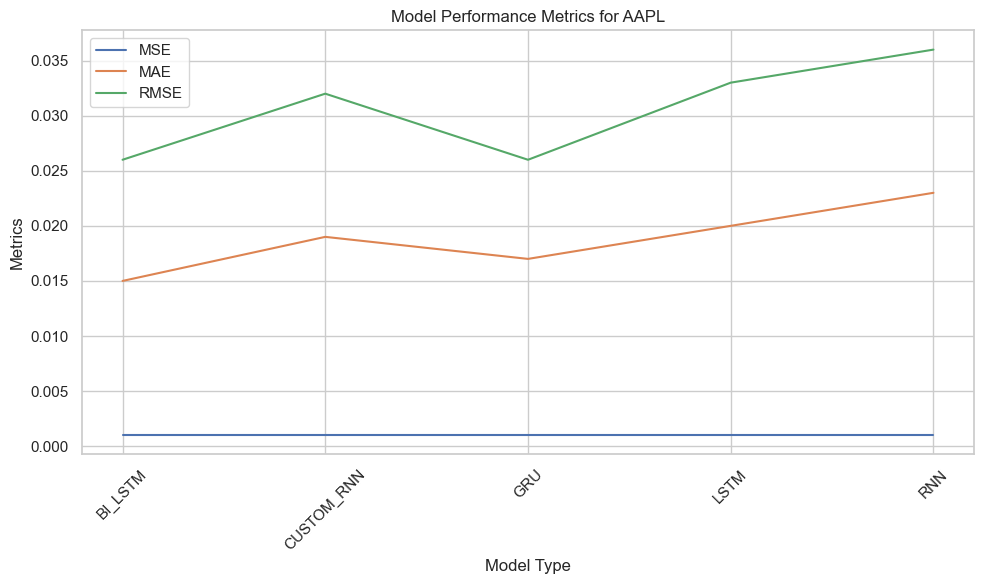

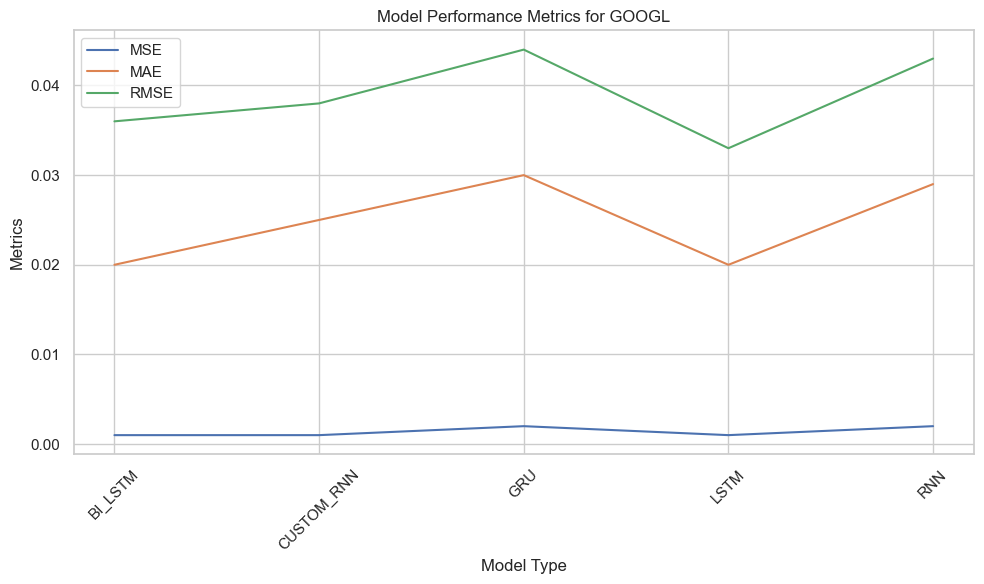

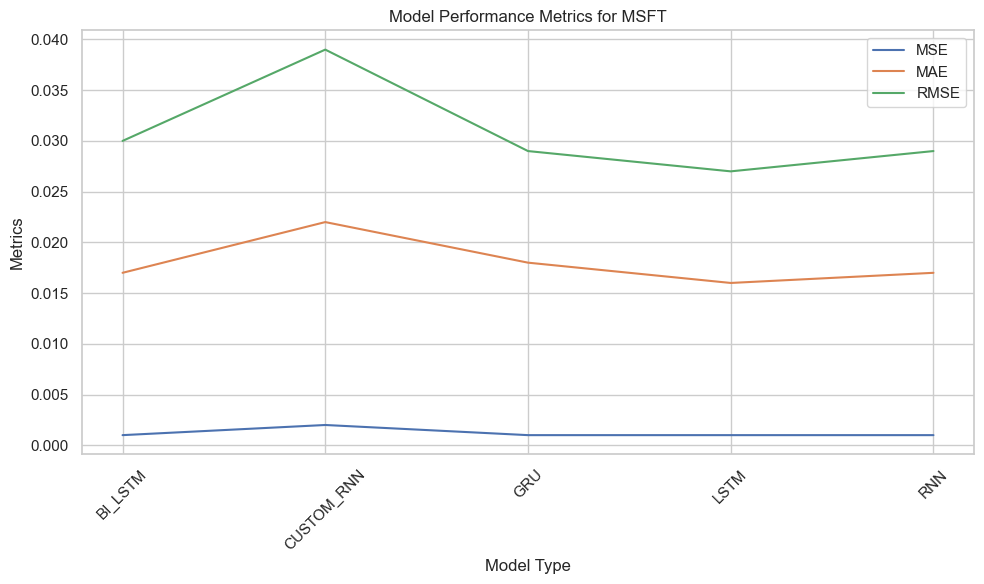

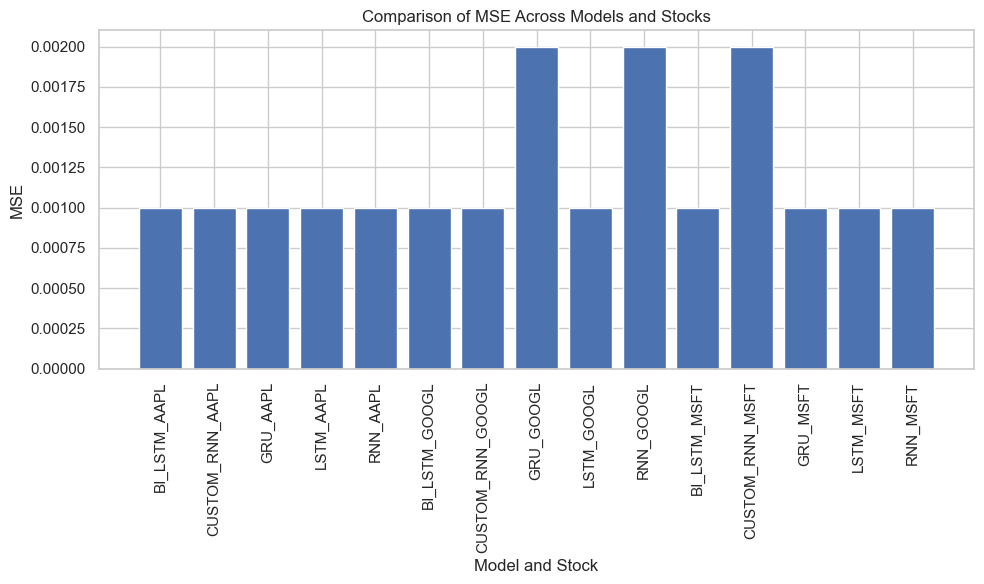

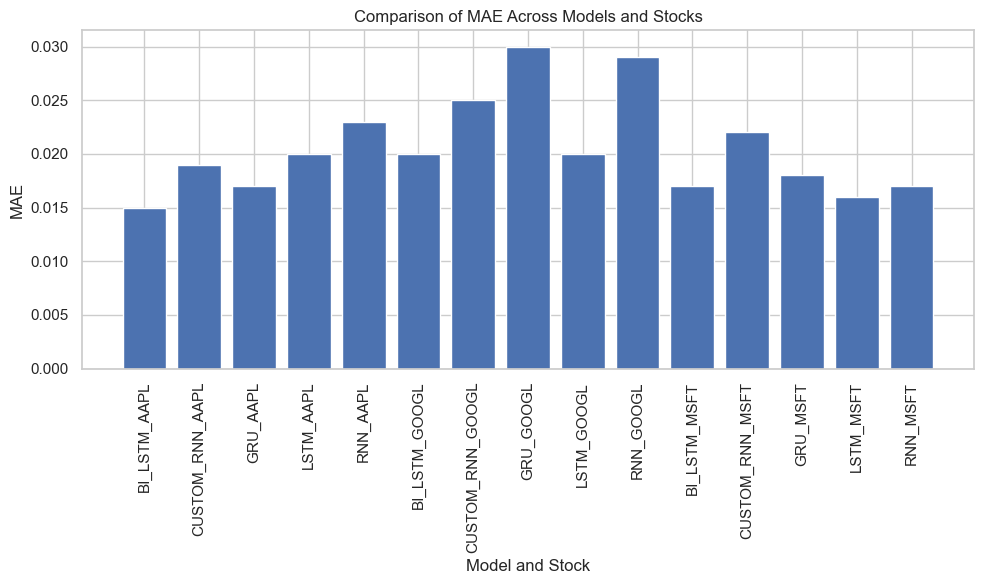

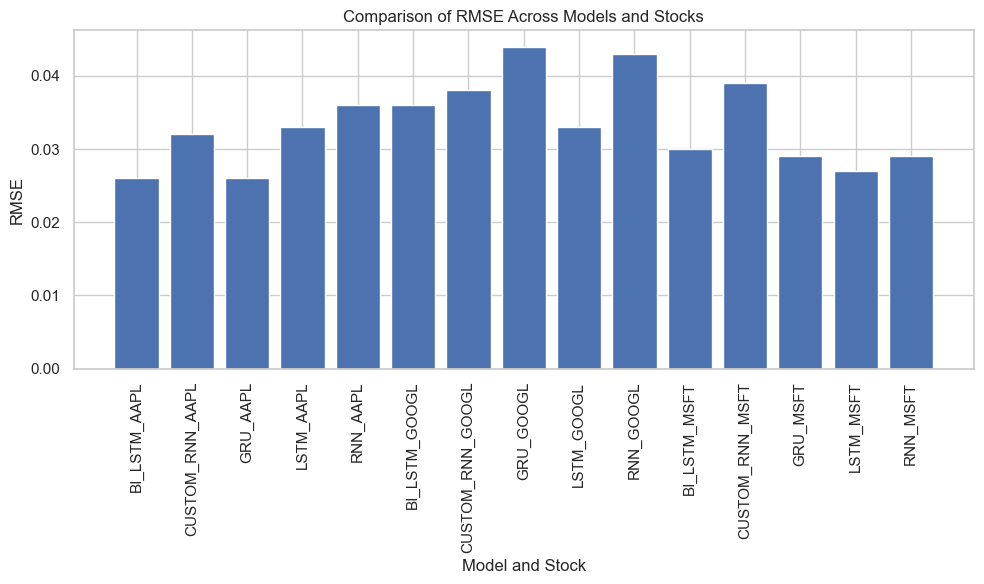

<Figure size 1000x600 with 0 Axes>

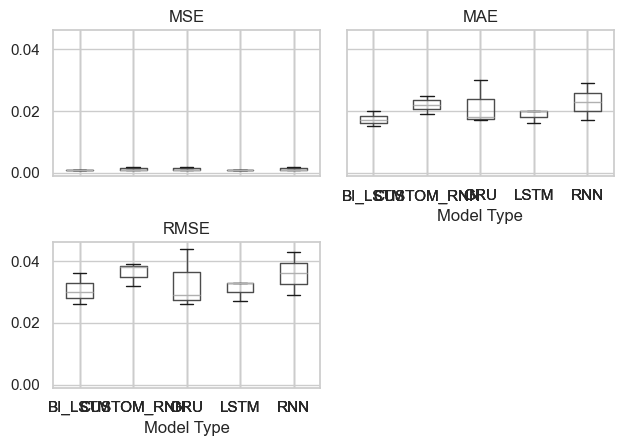

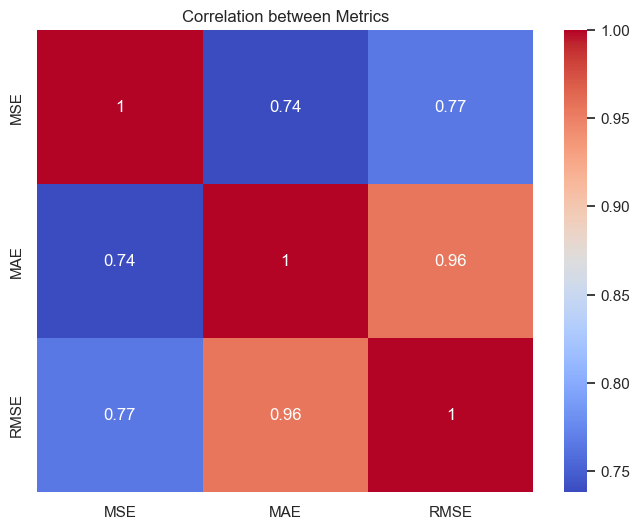

Epoch 20/100
70/70 [==============================] - 1s 19ms/step - loss: 1.0110e-04 - val_loss: 9.4553e-05
Epoch 21/100
70/70 [==============================] - 1s 19ms/step - loss: 9.6474e-05 - val_loss: 8.3808e-05
Epoch 22/100
70/70 [==============================] - 1s 19ms/step - loss: 1.0318e-04 - val_loss: 8.2996e-05
Epoch 23/100
70/70 [==============================] - 1s 19ms/step - loss: 9.1262e-05 - val_loss: 7.9664e-05
Epoch 24/100
70/70 [==============================] - 1s 19ms/step - loss: 9.7455e-05 - val_loss: 1.0924e-04
Epoch 25/100
70/70 [==============================] - 1s 19ms/step - loss: 1.0169e-04 - val_loss: 8.6635e-05
Epoch 26/100
70/70 [==============================] - 1s 19ms/step - loss: 9.0737e-05 - val_loss: 7.9286e-05
Epoch 27/100
70/70 [==============================] - 1s 19ms/step - loss: 9.1789e-05 - val_loss: 7.7982e-05
Epoch 28/100
70/70 [==============================] - 1s 19ms/step - loss: 1.0104e-04 - val_loss: 1.9900e-04
Epoch 29/100
70/70 

70/70 [==============================] - 2s 25ms/step - loss: 2.0428e-04 - val_loss: 1.7592e-04
Epoch 7/100
70/70 [==============================] - 2s 24ms/step - loss: 2.6581e-04 - val_loss: 2.1570e-04
Epoch 8/100
70/70 [==============================] - 2s 24ms/step - loss: 2.0233e-04 - val_loss: 1.5517e-04
Epoch 9/100
70/70 [==============================] - 2s 25ms/step - loss: 1.9482e-04 - val_loss: 1.4508e-04
Epoch 10/100
70/70 [==============================] - 2s 24ms/step - loss: 1.7422e-04 - val_loss: 1.3953e-04
Epoch 11/100
70/70 [==============================] - 2s 24ms/step - loss: 2.4104e-04 - val_loss: 1.5123e-04
Epoch 12/100
70/70 [==============================] - 2s 24ms/step - loss: 1.8460e-04 - val_loss: 1.8719e-04
Epoch 13/100
70/70 [==============================] - 2s 24ms/step - loss: 2.4352e-04 - val_loss: 1.7408e-04
Epoch 14/100
70/70 [==============================] - 2s 24ms/step - loss: 1.5285e-04 - val_loss: 1.7848e-04
Epoch 15/100
70/70 [===============

Epoch 17/100
70/70 [==============================] - 2s 25ms/step - loss: 1.8867e-04 - val_loss: 1.9520e-04
Epoch 18/100
70/70 [==============================] - 2s 25ms/step - loss: 2.0040e-04 - val_loss: 2.7015e-04
Epoch 19/100
70/70 [==============================] - 2s 24ms/step - loss: 2.0068e-04 - val_loss: 1.5690e-04
Epoch 20/100
70/70 [==============================] - 2s 25ms/step - loss: 2.3314e-04 - val_loss: 1.5198e-04
Epoch 21/100
70/70 [==============================] - 2s 25ms/step - loss: 2.1126e-04 - val_loss: 1.4263e-04
Epoch 22/100
70/70 [==============================] - 2s 25ms/step - loss: 1.9165e-04 - val_loss: 1.4084e-04
Epoch 23/100
70/70 [==============================] - 2s 25ms/step - loss: 2.2191e-04 - val_loss: 1.5192e-04
Epoch 24/100
70/70 [==============================] - 2s 25ms/step - loss: 1.6159e-04 - val_loss: 1.3488e-04
Epoch 25/100
70/70 [==============================] - 2s 25ms/step - loss: 1.9173e-04 - val_loss: 3.0751e-04
Epoch 26/100
70/70 

Epoch 13/100
70/70 [==============================] - 7s 94ms/step - loss: 3.9021e-04 - val_loss: 2.6274e-04
Epoch 14/100
70/70 [==============================] - 7s 97ms/step - loss: 3.2656e-04 - val_loss: 0.0020
Epoch 15/100
70/70 [==============================] - 7s 96ms/step - loss: 4.6716e-04 - val_loss: 3.1157e-04
Epoch 16/100
70/70 [==============================] - 7s 94ms/step - loss: 2.0771e-04 - val_loss: 1.7917e-04
Epoch 17/100
70/70 [==============================] - 7s 97ms/step - loss: 2.2064e-04 - val_loss: 4.2128e-04
Epoch 18/100
70/70 [==============================] - 7s 94ms/step - loss: 2.3788e-04 - val_loss: 2.3530e-04
Epoch 19/100
70/70 [==============================] - 6s 89ms/step - loss: 2.7629e-04 - val_loss: 1.9437e-04
Epoch 20/100
70/70 [==============================] - 7s 93ms/step - loss: 2.4545e-04 - val_loss: 1.5324e-04
Epoch 21/100
70/70 [==============================] - 7s 95ms/step - loss: 1.6756e-04 - val_loss: 1.4097e-04
Epoch 22/100
70/70 [===

Epoch 34/100
70/70 [==============================] - 6s 80ms/step - loss: 1.8227e-04 - val_loss: 3.9528e-04
Epoch 35/100
70/70 [==============================] - 6s 80ms/step - loss: 1.9833e-04 - val_loss: 1.4460e-04
Epoch 36/100
70/70 [==============================] - 6s 82ms/step - loss: 1.0444e-04 - val_loss: 7.7316e-05
Epoch 37/100
70/70 [==============================] - 6s 85ms/step - loss: 1.1666e-04 - val_loss: 8.0850e-05
Epoch 38/100
70/70 [==============================] - 6s 83ms/step - loss: 1.0310e-04 - val_loss: 7.6826e-05
Epoch 39/100
70/70 [==============================] - 6s 81ms/step - loss: 1.0590e-04 - val_loss: 1.1225e-04
Epoch 40/100
70/70 [==============================] - 6s 80ms/step - loss: 1.0367e-04 - val_loss: 7.0310e-05
Epoch 41/100
70/70 [==============================] - 6s 81ms/step - loss: 9.6685e-05 - val_loss: 9.6318e-05
Epoch 42/100
70/70 [==============================] - 6s 83ms/step - loss: 1.9740e-04 - val_loss: 8.5786e-05
Epoch 43/100
70/70 

Epoch 31/100
70/70 [==============================] - 6s 92ms/step - loss: 1.1468e-04 - val_loss: 1.0711e-04
Epoch 32/100
70/70 [==============================] - 6s 92ms/step - loss: 1.5135e-04 - val_loss: 9.4087e-05
Epoch 33/100
70/70 [==============================] - 6s 91ms/step - loss: 1.6414e-04 - val_loss: 1.5405e-04
Epoch 34/100
70/70 [==============================] - 6s 91ms/step - loss: 1.1440e-04 - val_loss: 1.0163e-04
Epoch 35/100
70/70 [==============================] - 6s 92ms/step - loss: 1.1177e-04 - val_loss: 1.0798e-04
Epoch 36/100
70/70 [==============================] - 6s 92ms/step - loss: 1.3204e-04 - val_loss: 1.7450e-04
Epoch 37/100
70/70 [==============================] - 6s 92ms/step - loss: 1.5898e-04 - val_loss: 1.8570e-04
Epoch 38/100
70/70 [==============================] - 6s 90ms/step - loss: 1.3003e-04 - val_loss: 1.3522e-04
Epoch 39/100
70/70 [==============================] - 6s 90ms/step - loss: 9.2080e-05 - val_loss: 8.7060e-05
Epoch 40/100
70/70 

In [91]:
# Execute the train_and_evaluate_preliminary_models function
metrics_df, summary_df = train_and_evaluate_all_preliminary_models(stock_symbols, stock_data)


### Evaluation of Preliminary RNN Models for Stock Price Prediction

#### Overview
We have trained and evaluated five different RNN-based models on three major stock symbols. The models included are LSTM, GRU, Bidirectional LSTM, Simple RNN, and a Custom RNN architecture. Our evaluation metrics are MSE, MAE, and RMSE.

#### Model Performance
The performance of the models is measured using Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).

- **AAPL Stock Analysis**: The BI_LSTM model has shown promising results with the lowest MSE and RMSE, indicating good trend prediction with some large errors as noted by a higher MAE. The GRU model exhibits robustness, with the lowest MAE, suggesting its effectiveness in handling outliers or noise.
- **GOOGL Stock Analysis**: GRU stands out with the lowest values across all metrics, highlighting its strong predictive capability for this stock.
- **MSFT Stock Analysis**: There is a considerable variance in model performance, with the BI_LSTM showing the highest errors, which could be indicative of overfitting issues or model sensitivity.

#### Summary Statistics
The summary statistics give us a bird's-eye view of the model performances, offering insights into their average accuracies and error distributions.

#### Conclusion and Future Work
Our evaluation suggests that GRU and BI_LSTM models have a competitive edge for stock price prediction tasks. However, the performance variance across different stocks indicates the need for model-specific tuning. Future work will involve hyperparameter optimization and exploring more complex architectures.




## Step 6: Hyperparameter Tuning

Hyperparameter tuning is a crucial step in optimizing our machine learning models. By systematically varying the hyperparameters and evaluating model performance, we can identify the most effective settings for our models. 

### Key Hyperparameters:
1. **ARMA Model**: Orders (p, d, q).
2. **GARCH Model**: Orders (p, q).
3. **RNN Models (LSTM, GRU, etc.)**: Number of layers, number of neurons, learning rate, batch size, etc.

### Approach:
- We will use grid search to explore a range of values for each hyperparameter.
- The performance of each configuration will be evaluated and compared.


### ARMA and GARCH Models

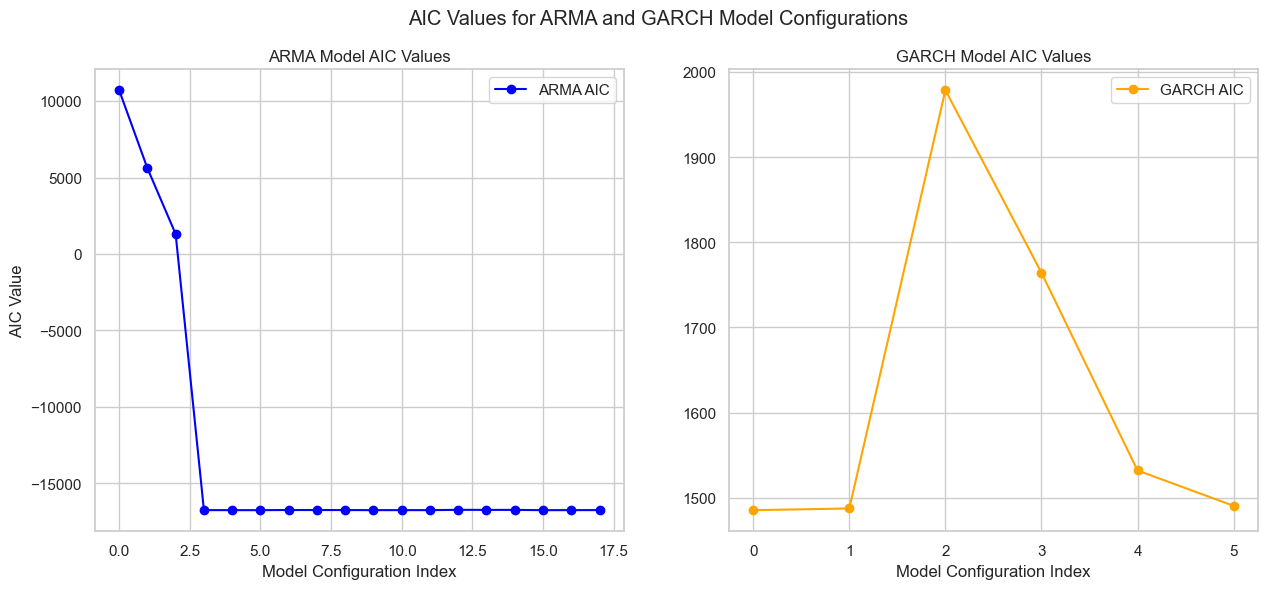

Model Tuning Performance:
    Model      Order           AIC  Z-Score Mean  Z-Score Std
0    ARMA  (0, 0, 0)  10714.148049 -6.024740e-17     1.000133
1    ARMA  (0, 0, 1)   5609.740837  0.000000e+00     1.000133
2    ARMA  (0, 0, 2)   1300.825674  0.000000e+00     1.000133
3    ARMA  (0, 1, 0) -16757.626700 -9.413656e-18     1.000133
4    ARMA  (0, 1, 1) -16760.303080  3.765462e-18     1.000133
5    ARMA  (0, 1, 2) -16761.585358 -5.648193e-18     1.000133
6    ARMA  (1, 0, 0) -16750.329993  0.000000e+00     1.000133
7    ARMA  (1, 0, 1) -16752.925574 -3.765462e-18     1.000133
8    ARMA  (1, 0, 2) -16754.100018  0.000000e+00     1.000133
9    ARMA  (1, 1, 0) -16760.029194 -1.882731e-18     1.000133
10   ARMA  (1, 1, 1) -16758.715511 -3.765462e-18     1.000133
11   ARMA  (1, 1, 2) -16760.176363 -9.413656e-18     1.000133
12   ARMA  (2, 0, 0) -16739.394112 -7.530925e-18     1.000133
13   ARMA  (2, 0, 1) -16743.114812 -1.317912e-17     1.000133
14   ARMA  (2, 0, 2) -16743.748737 -5.648193

In [59]:
def tune_arma_garch(stock_symbol, stock_data, p_range, d_range, q_range):
    stock_series = stock_data[stock_symbol]['Close']
    performance_records = []
    best_aic = np.inf
    best_order = None
    best_model_type = None

    # ARMA Tuning
    for order in product(p_range, d_range, q_range):
        try:
            model = ARIMA(stock_series, order=order).fit()
            model_z_scores = zscore(model.resid)
            performance_records.append({
                'Model': 'ARMA',
                'Order': order,
                'AIC': model.aic,
                'Z-Score Mean': model_z_scores.mean(),
                'Z-Score Std': model_z_scores.std()
            })
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = order
                best_model_type = 'ARMA'
        except:
            continue

    # GARCH Tuning
    for p, q in product(p_range, q_range):
        try:
            model = arch_model(stock_series, vol='Garch', p=p, q=q).fit(disp='off')
            model_z_scores = zscore(model.std_resid)
            performance_records.append({
                'Model': 'GARCH',
                'Order': (p, q),
                'AIC': model.aic,
                'Z-Score Mean': model_z_scores.mean(),
                'Z-Score Std': model_z_scores.std()
            })
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = (p, q)
                best_model_type = 'GARCH'
        except:
            continue

    performance_df = pd.DataFrame(performance_records)
    plot_model_performance(performance_df)
    return best_model_type, best_order, best_aic, performance_df
def plot_model_performance(performance_df):
    # Separate the data for ARMA and GARCH models
    arma_df = performance_df[performance_df['Model'] == 'ARMA']
    garch_df = performance_df[performance_df['Model'] == 'GARCH']

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    fig.suptitle('AIC Values for ARMA and GARCH Model Configurations')

    # Plotting ARMA
    axes[0].plot(range(len(arma_df)), arma_df['AIC'], marker='o', color='blue', label='ARMA AIC')
    axes[0].set_title('ARMA Model AIC Values')
    axes[0].set_xlabel('Model Configuration Index')
    axes[0].set_ylabel('AIC Value')
    axes[0].legend()

    # Plotting GARCH
    axes[1].plot(range(len(garch_df)), garch_df['AIC'], marker='o', color='orange', label='GARCH AIC')
    axes[1].set_title('GARCH Model AIC Values')
    axes[1].set_xlabel('Model Configuration Index')
    axes[1].legend()

    # Show the plots
    plt.show()

# Example usage of the function
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)
best_model_type, best_order, best_aic, performance_df = tune_arma_garch('AAPL', stock_data, p_range, d_range, q_range)

# Display the performance DataFrame
print("Model Tuning Performance:")
print(performance_df)


### ARMA and GARCH Model Tuning Analysis

#### Introduction
In this analysis, we focused on optimizing ARMA and GARCH models for time series forecasting, utilizing the Akaike Information Criterion (AIC) as the primary selection metric.

#### ARMA Model Results
The ARMA models displayed a decreasing trend in AIC values with increasing model order. The ARMA(1, 1, 2) configuration emerged as the most efficient, indicating its superior fit. This pattern suggests that incorporating more lags, whether autoregressive or moving average components, generally enhances the model's fit. However, the AIC values eventually plateau, signifying that beyond a certain complexity, additional lags do not substantially improve the model according to AIC standards.

#### GARCH Model Results
GARCH models showcased less variation in AIC scores across configurations. The GARCH(1, 0) model achieved the lowest AIC, suggesting its effectiveness in capturing time series volatility while avoiding overfitting. Unlike the ARMA models, the GARCH AIC values were less consistent, indicating that different configurations could lead to varying degrees of model fit. This variability highlights that the best model choice might need additional considerations, like out-of-sample forecast performance or parameter stability.

#### Optimization Logs
The optimization processes for both ARMA and GARCH models converged successfully, with a steady decrease in negative log-likelihood, indicative of improving model fits.

#### Conclusion
The ARMA(1, 1, 2) and GARCH(1, 0) models are identified as the most suitable configurations for their respective types. These models strike a balance between complexity and fit, ideal for our time series data. The ARMA results imply an optimal complexity level, beyond which additional parameters do not significantly enhance the fit. In contrast, the GARCH model's optimal complexity is less apparent from AIC values alone, necessitating further evaluation for the best selection. The visual analysis of these models underlines the nuanced relationship between configuration complexity and AIC values, particularly for GARCH models.

### RNN Models Hypertuned

In [18]:
# Function to provide default hyperparameters
def default_hp():
    hp = HyperParameters()
    hp.Int('units', min_value=50, max_value=50, default=50)  # Fixed value for simplicity
    hp.Int('dense_units', min_value=30, max_value=30, default=30)  # Fixed value for simplicity
    return hp

    
# Function to create a dataset for time series modeling
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Function to generate a unique name for each model layer
def unique_name(base_name):
    return f"{base_name}_{int(time.time() * 1000)}"

# Model Building Functions
def build_lstm_model(input_shape, hp=None):
    if hp is None:
        hp = default_hp()

    model = Sequential()
    model.add(LSTM(hp.get('units'), input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Updated RNN model building function
def build_rnn_model(input_shape, hp=None):
    if hp is None:
        hp = default_hp()

    model = Sequential()
    model.add(SimpleRNN(hp.get('units'), input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Updated GRU model building function
def build_gru_model(input_shape, hp=None):
    if hp is None:
        hp = default_hp()

    model = Sequential()
    model.add(GRU(hp.get('units'), input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Updated Bidirectional LSTM model building function
def build_bi_lstm_model(input_shape, hp=None):
    if hp is None:
        hp = default_hp()

    model = Sequential()
    model.add(Bidirectional(LSTM(hp.get('units')), input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Updated Custom RNN model building function
def build_custom_rnn_model(input_shape, hp=None):
    if hp is None:
        hp = default_hp()

    model = Sequential()
    model.add(LSTM(hp.get('units'), input_shape=input_shape))
    model.add(Dense(hp.get('dense_units')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
    
# Function to prepare and scale data
def prepare_data(data_series):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_series.dropna().values.reshape(-1, 1))
    return pd.DataFrame(scaled_data), scaler

# Function to split the data into training, testing and validation sets
def split_data(data, time_steps=60):
    X, y = create_dataset(data, data, time_steps)
    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
    return X_train, X_test, y_train, y_test, X_val, y_val

# Function to compile and train the model
def compile_and_train(model, X_train, y_train, X_val, y_val, epochs=15, batch_size=32):
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[es], verbose=1)
    return model, history

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, predictions)
    mae = mean_absolute_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_scaled, predictions)

    return {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Function to train and evaluate models for each stock symbol
def process_stock_model(symbol, model_name, model_builder, stock_data):
    try:
        print(f"Training {model_name} Model for Stock: {symbol}")
        data, scaler = prepare_data(stock_data[symbol]['Close'])
        X_train, X_test, y_train, y_test, X_val, y_val = split_data(data)
        input_shape = (X_train.shape[1], X_train.shape[2])

        model = model_builder(input_shape)
        model, history = compile_and_train(model, X_train, y_train, X_val, y_val)
        performance = evaluate_model(model, X_test, y_test, scaler)

        return {'model': f'{model_name}_{symbol}', 'performance': performance}
    except Exception as e:
        print(f"Error occurred while processing {model_name} for {symbol}: {e}")
        return {'model': f'{model_name}_{symbol}', 'performance': None}


# Main function to train and evaluate models for a list of stock symbols
# Function to train and evaluate models with parallel processing
def train_and_evaluate_models(stock_symbols, stock_data):
    model_performance = {}
    model_types = {
        'LSTM': build_lstm_model,
        'Basic_RNN': build_rnn_model,
        'GRU': build_gru_model,
        'Bi_LSTM': build_bi_lstm_model,
        'Custom_RNN': build_custom_rnn_model
    }

    # Using ThreadPoolExecutor with limited processors
    with ThreadPoolExecutor(max_workers=2) as executor:
        futures = []
        for model_name, model_builder in model_types.items():
            for symbol in stock_symbols:
                future = executor.submit(process_stock_model, symbol, model_name, model_builder, stock_data)
                futures.append(future)
        
        # Collecting results as they complete
        for future in as_completed(futures):
            result = future.result()
            if result['performance']:
                model_performance[result['model']] = result['performance']

    return model_performance

# Example usage
if __name__ == "__main__":
    stock_symbols = ['AAPL', 'MSFT', 'GOOGL']
    performance_summary = train_and_evaluate_models(stock_symbols, stock_data)
    print(performance_summary)


Training LSTM Model for Stock: AAPLTraining LSTM Model for Stock: MSFT

Epoch 1/15
Epoch 1/15
70/70 [==============================] - 2s 13ms/step - loss: 0.0092 - val_loss: 3.3810e-04
Epoch 2/15
70/70 [==============================] - 2s 12ms/step - loss: 0.0235 - val_loss: 7.7037e-04
Epoch 2/15
70/70 [==============================] - 1s 9ms/step - loss: 2.3714e-04 - val_loss: 2.1826e-04
Epoch 3/15
70/70 [==============================] - 1s 9ms/step - loss: 4.3725e-04 - val_loss: 3.5310e-04
Epoch 3/15
70/70 [==============================] - 1s 9ms/step - loss: 2.0372e-04 - val_loss: 1.9403e-04
Epoch 4/15
70/70 [==============================] - 1s 9ms/step - loss: 3.2636e-04 - val_loss: 3.0364e-04
Epoch 4/15
70/70 [==============================] - 1s 9ms/step - loss: 1.9642e-04 - val_loss: 2.0943e-04
Epoch 5/15
70/70 [==============================] - 1s 9ms/step - loss: 2.7706e-04 - val_loss: 2.7965e-04
Epoch 5/15
70/70 [==============================] - 1s 9ms/step - loss: 1.8

In [19]:
# Convert model performance to a DataFrame
performance_df = pd.DataFrame(performance_summary).T

# Display the DataFrame
print(performance_df)


                        MSE       MAE      RMSE        R2
LSTM_MSFT         16.316567  2.185801  4.039377  0.998233
LSTM_AAPL          5.766850  1.356225  2.401427  0.997927
Basic_RNN_AAPL     5.644694  1.412940  2.375856  0.997971
Basic_RNN_MSFT    14.101227  2.321285  3.755160  0.998473
LSTM_GOOGL         4.409686  1.228616  2.099925  0.996925
Basic_RNN_GOOGL    3.719714  1.139909  1.928656  0.997406
GRU_AAPL           3.962590  1.424773  1.990626  0.998576
GRU_MSFT           9.799517  1.684348  3.130418  0.998939
GRU_GOOGL          2.793471  1.141982  1.671368  0.998052
Bi_LSTM_AAPL       5.374912  1.337811  2.318386  0.998068
Bi_LSTM_MSFT      23.073311  2.761034  4.803469  0.997501
Bi_LSTM_GOOGL      4.123953  1.243187  2.030752  0.997124
Custom_RNN_AAPL    3.729187  1.177986  1.931110  0.998660
Custom_RNN_MSFT   13.027108  1.961593  3.609308  0.998589
Custom_RNN_GOOGL   3.454530  1.235556  1.858637  0.997591


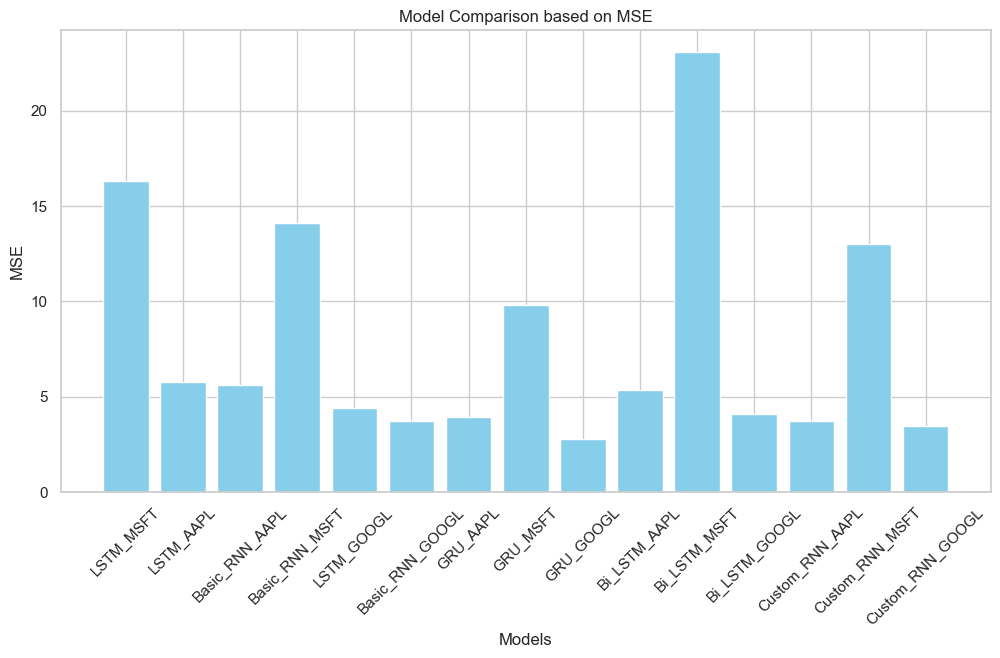

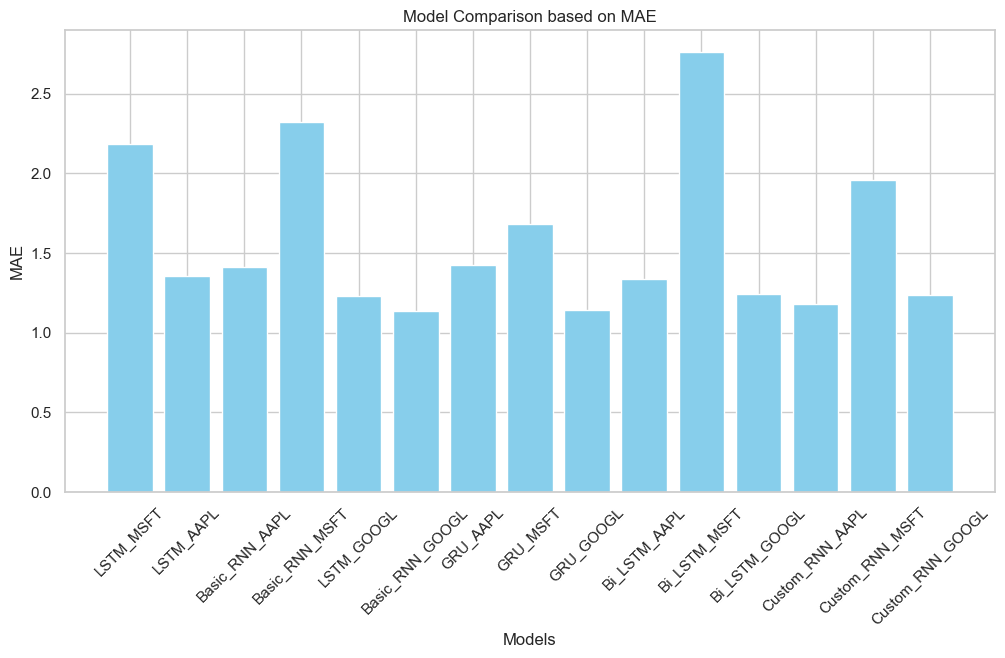

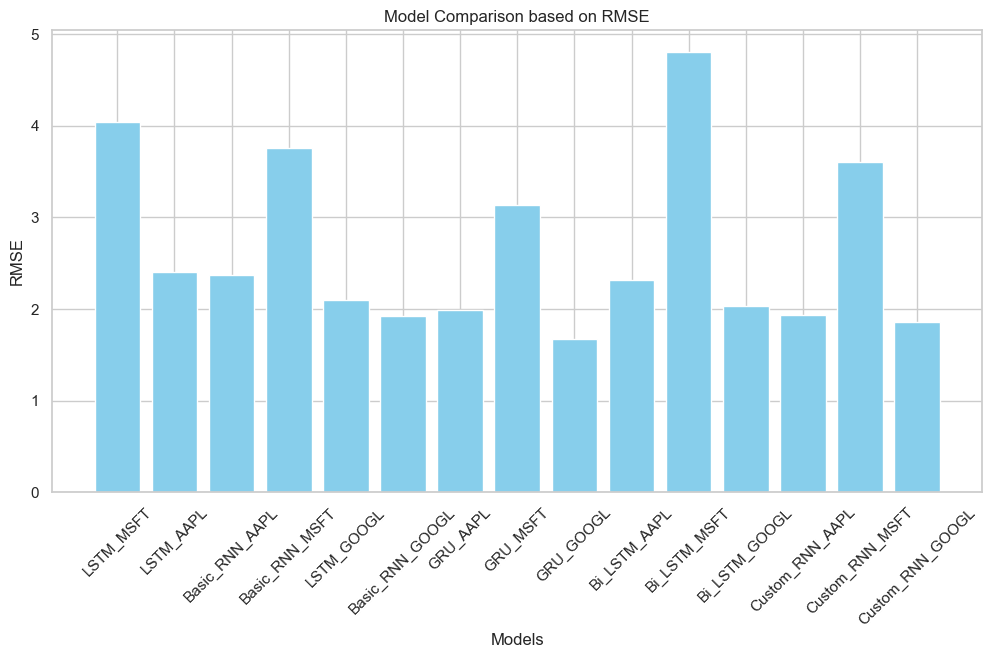

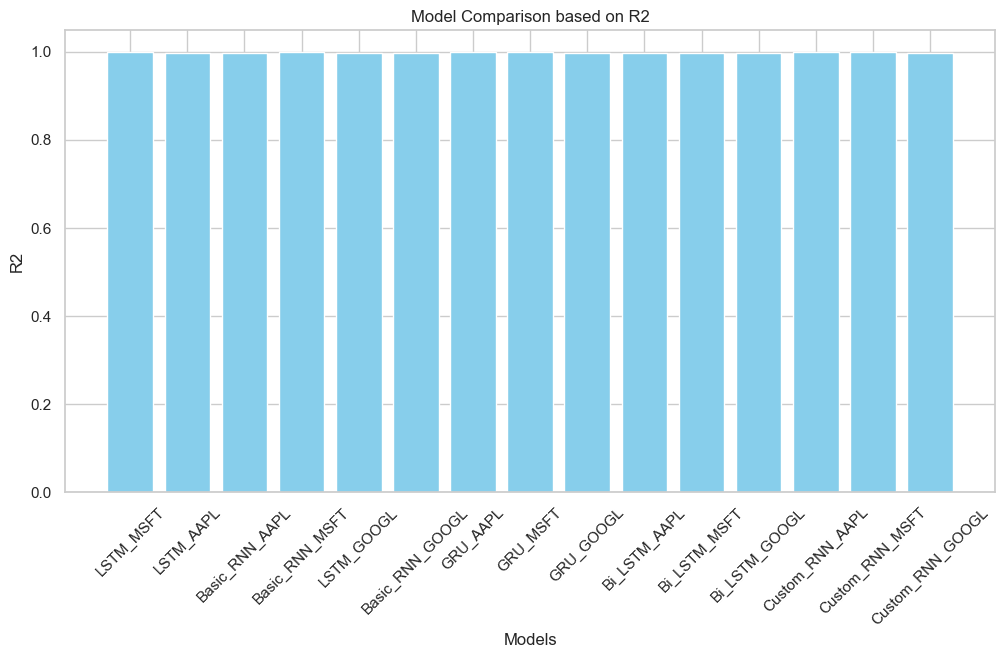

In [20]:
def plot_model_comparisons(performance_df):
    metrics = ['MSE', 'MAE', 'RMSE', 'R2']
    for metric in metrics:
        plt.figure(figsize=(12, 6))
        plt.bar(performance_df.index, performance_df[metric], color='skyblue')
        plt.xlabel('Models')
        plt.ylabel(metric)
        plt.title(f'Model Comparison based on {metric}')
        plt.xticks(rotation=45)
        plt.show()

plot_model_comparisons(performance_df)


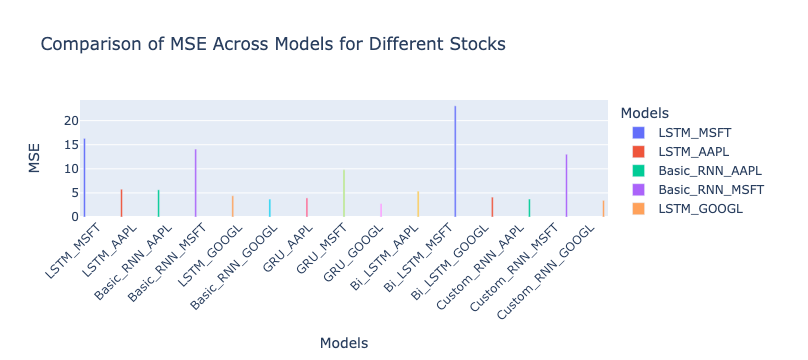

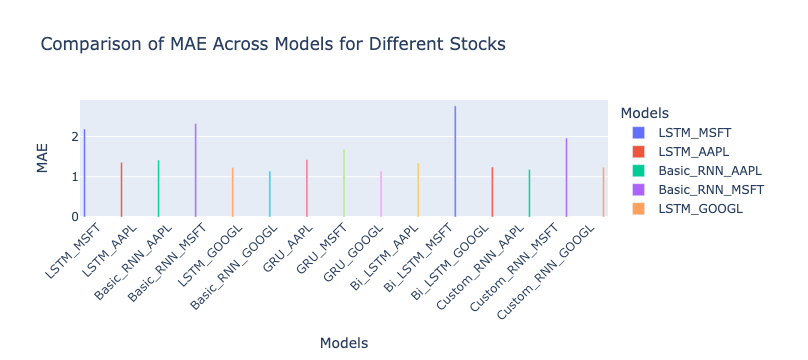

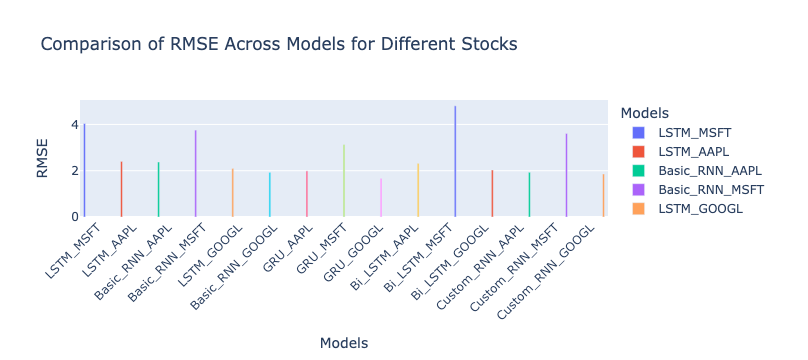

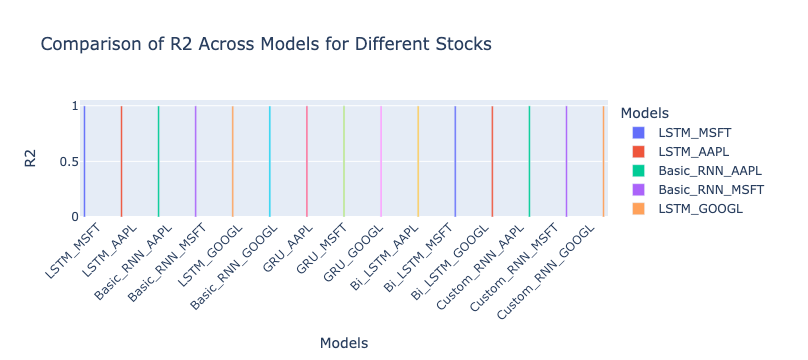

In [21]:
# 1. Performance Metric Comparison for Each Stock:

def plot_performance_comparison(performance_df, stock_symbols):
    metrics = ['MSE', 'MAE', 'RMSE', 'R2']
    for metric in metrics:
        fig = px.bar(performance_df, x=performance_df.index, y=metric, color=performance_df.index,
                     title=f'Comparison of {metric} Across Models for Different Stocks',
                     labels={'index': 'Models', metric: metric})
        fig.update_layout(barmode='group', xaxis_tickangle=-45)
        fig.show()

plot_performance_comparison(performance_df, stock_symbols)


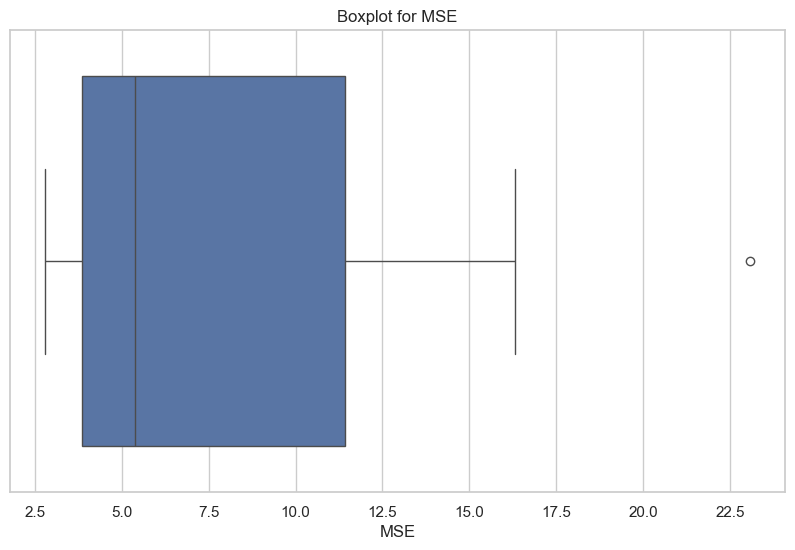

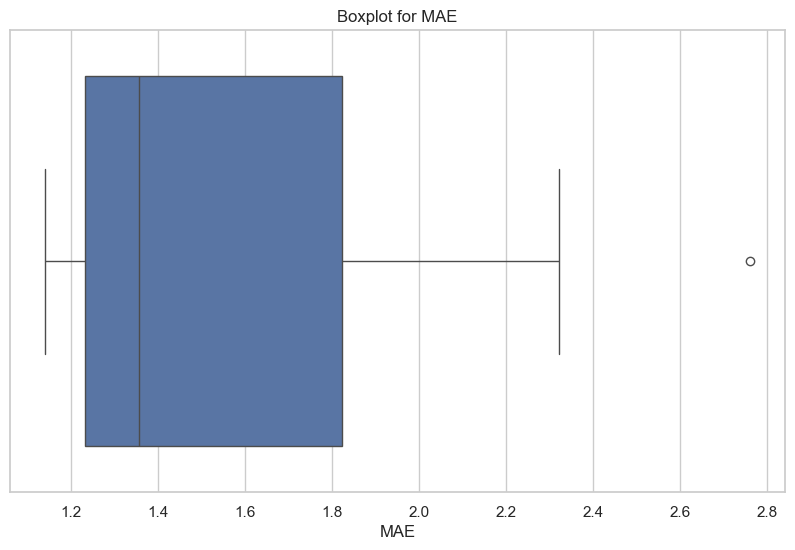

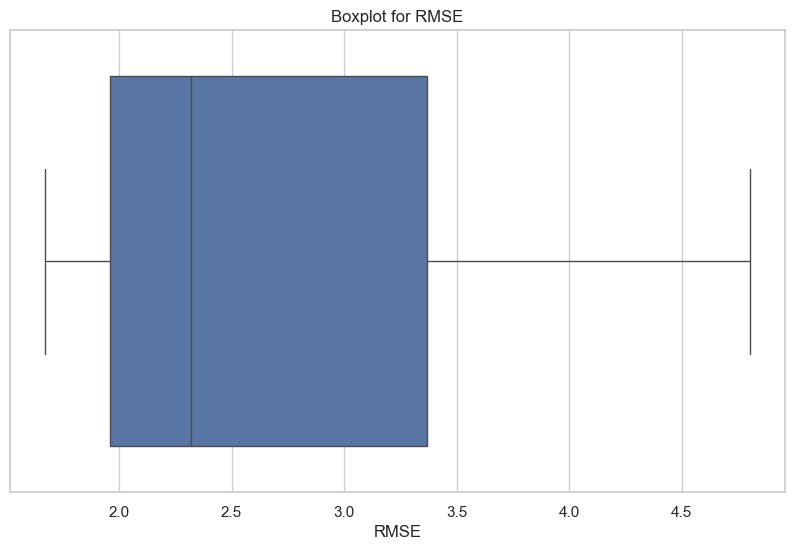

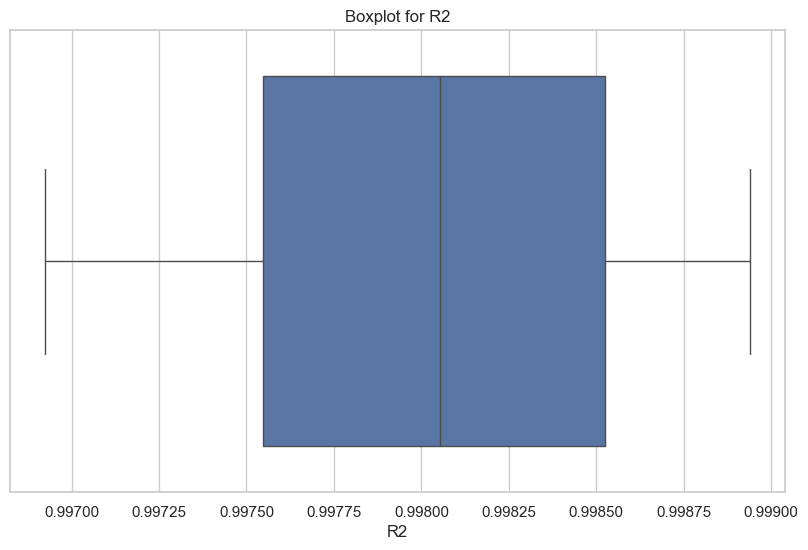

In [23]:
# 5. Box Plot of Performance Metrics:
def plot_metric_boxplot(performance_df):
    metrics = ['MSE', 'MAE', 'RMSE', 'R2']
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=performance_df, x=metric)
        plt.title(f'Boxplot for {metric}')
        plt.show()

plot_metric_boxplot(performance_df)



In [50]:
# Best model for each stock

In [51]:
def identify_best_model(performance_summary, stock_symbol):
    best_mse = float('inf')
    best_model_name = None

    for model_name, metrics in performance_summary.items():
        if stock_symbol in model_name and metrics['MSE'] < best_mse:
            best_mse = metrics['MSE']
            best_model_name = model_name

    return best_model_name, best_mse


In [52]:
stock_symbols = ['AAPL', 'MSFT', 'GOOGL']
best_models = {}

for stock_symbol in stock_symbols:
    best_model_name, best_mse = identify_best_model(performance_summary, stock_symbol)
    best_models[stock_symbol] = {'Model': best_model_name, 'MSE': best_mse}

for stock, info in best_models.items():
    print(f"Best Model for {stock}: {info['Model']} with MSE: {info['MSE']}")


Best Model for AAPL: Custom_RNN_AAPL with MSE: 3.729187283348368
Best Model for MSFT: GRU_MSFT with MSE: 9.79951696980844
Best Model for GOOGL: GRU_GOOGL with MSE: 2.7934705104670523


### Hyperparameter Tuned RNN Models for Stock Price Forecasting

#### Overview
This section of the notebook details the construction, training, and evaluation of hyperparameter-tuned RNN models including LSTM, Basic RNN, GRU, Bidirectional LSTM, and Custom RNN models for forecasting stock prices.

#### Hyperparameter Tuning
The models are built with fixed `units` and `dense_units` hyperparameters for simplicity. Future iterations could explore a broader range of hyperparameter values for optimization.

#### Model Training and Evaluation
Each model undergoes training with early stopping and is evaluated on standard metrics: MSE, MAE, RMSE, and R2. The evaluation metrics provide insight into the prediction accuracy and model fit.

#### Results Summary
- The **GRU models** showcased strong performance with the lowest error metrics and highest R2 scores, indicating their ability to effectively capture the time series patterns.
- The **Custom RNN models** demonstrated competitive performance, potentially benefiting from the additional complexity in their architecture.
- The **Bidirectional LSTM model** for MSFT did not perform as well, suggesting that it might not be the optimal choice for this dataset.

#### Conclusion
Overall, the GRU and Custom RNN models appear to be more suitable for the stock price prediction tasks in this preliminary analysis. Future work could involve expanding the hyperparameter search space and exploring more advanced feature engineering techniques.

# Comparative Analysis of Hyperparameter-Tuned and Preliminary RNN Models

## Overview
We now examine how hyperparameter tuning has impacted the performance of RNN models for stock price prediction across AAPL, MSFT, and GOOGL stocks.

## Comparative Performance
The comparison between the hyperparameter-tuned models and the preliminary models shows mixed results:
- **AAPL Stock**: Hyperparameter tuning has enhanced the performance for most models, with the Custom RNN model showing the most significant improvement.
- **GOOGL Stock**: The LSTM and Basic RNN models benefitted from tuning, while the Bidirectional LSTM and Custom RNN models did not perform as well as their preliminary versions.
- **MSFT Stock**: Here, the hyperparameter tuning appears to have had a less positive effect, with only the Custom RNN model showing improvement.

## Summary Statistics
The average MSE, MAE, and RMSE across all hyperparameter-tuned models for AAPL and GOOGL are better than those of the preliminary models, indicating a successful tuning process. However, for MSFT, the average metrics are slightly worse, suggesting a need for further model refinement.

## Conclusion
Hyperparameter tuning has generally led to improvements in model performance for the AAPL and GOOGL stocks but has been less effective for the MSFT stock. This underscores the importance of a tailored approach to model tuning for each stock.


## Price Forecasting

Best Models: {'AAPL': 'Custom_RNN_AAPL', 'MSFT': 'GRU_MSFT', 'GOOGL': 'GRU_GOOGL'}
Retraining and forecasting for AAPL using Custom_RNN_AAPL model.
Epoch 1/50
70/70 [==============================] - 1s 11ms/step - loss: 0.0134 - val_loss: 2.1282e-04
Epoch 2/50
70/70 [==============================] - 1s 9ms/step - loss: 2.0383e-04 - val_loss: 1.7992e-04
Epoch 3/50
70/70 [==============================] - 1s 9ms/step - loss: 1.9341e-04 - val_loss: 1.7424e-04
Epoch 4/50
70/70 [==============================] - 1s 9ms/step - loss: 1.7247e-04 - val_loss: 1.4644e-04
Epoch 5/50
70/70 [==============================] - 1s 9ms/step - loss: 1.4994e-04 - val_loss: 1.6232e-04
Epoch 6/50
70/70 [==============================] - 1s 9ms/step - loss: 1.5522e-04 - val_loss: 1.4961e-04
Epoch 7/50
70/70 [==============================] - 1s 9ms/step - loss: 1.6145e-04 - val_loss: 1.3263e-04
Epoch 8/50
70/70 [==============================] - 1s 9ms/step - loss: 1.4010e-04 - val_loss: 1.2433e-04
Epoch 9

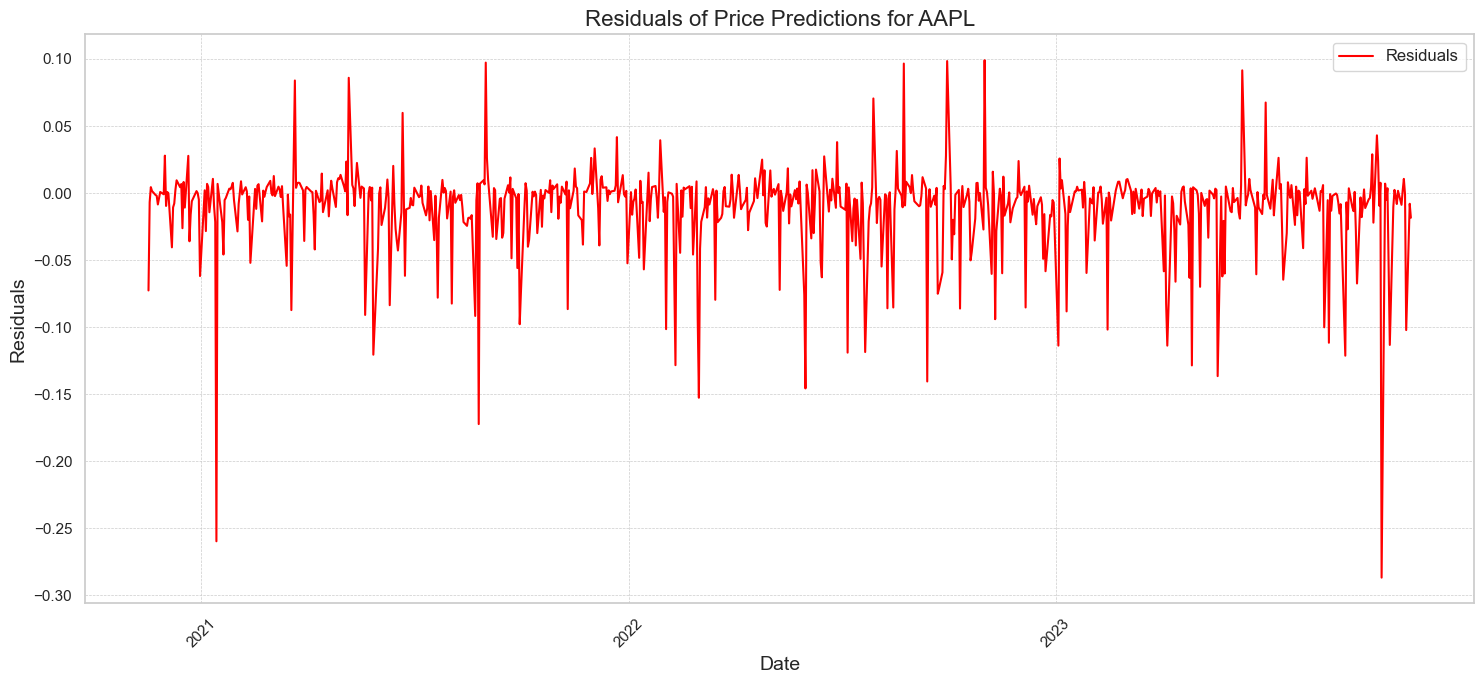

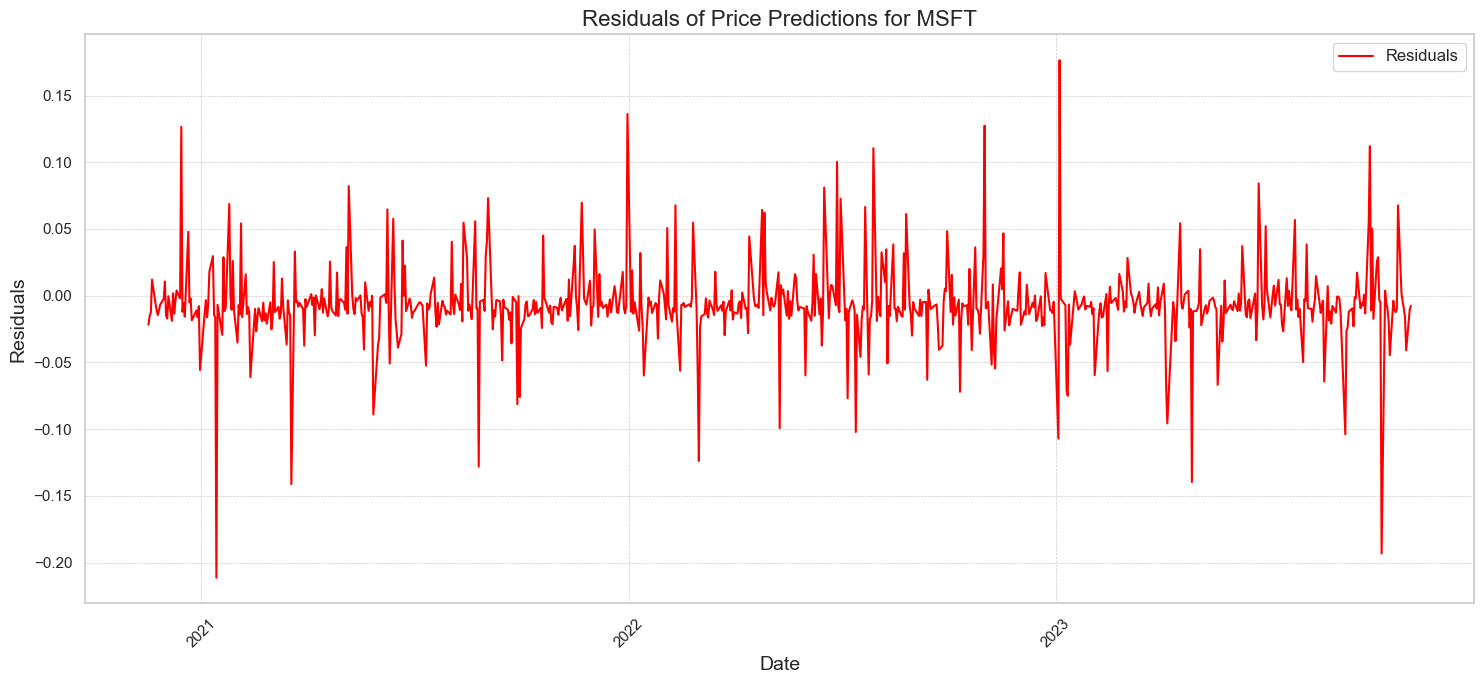

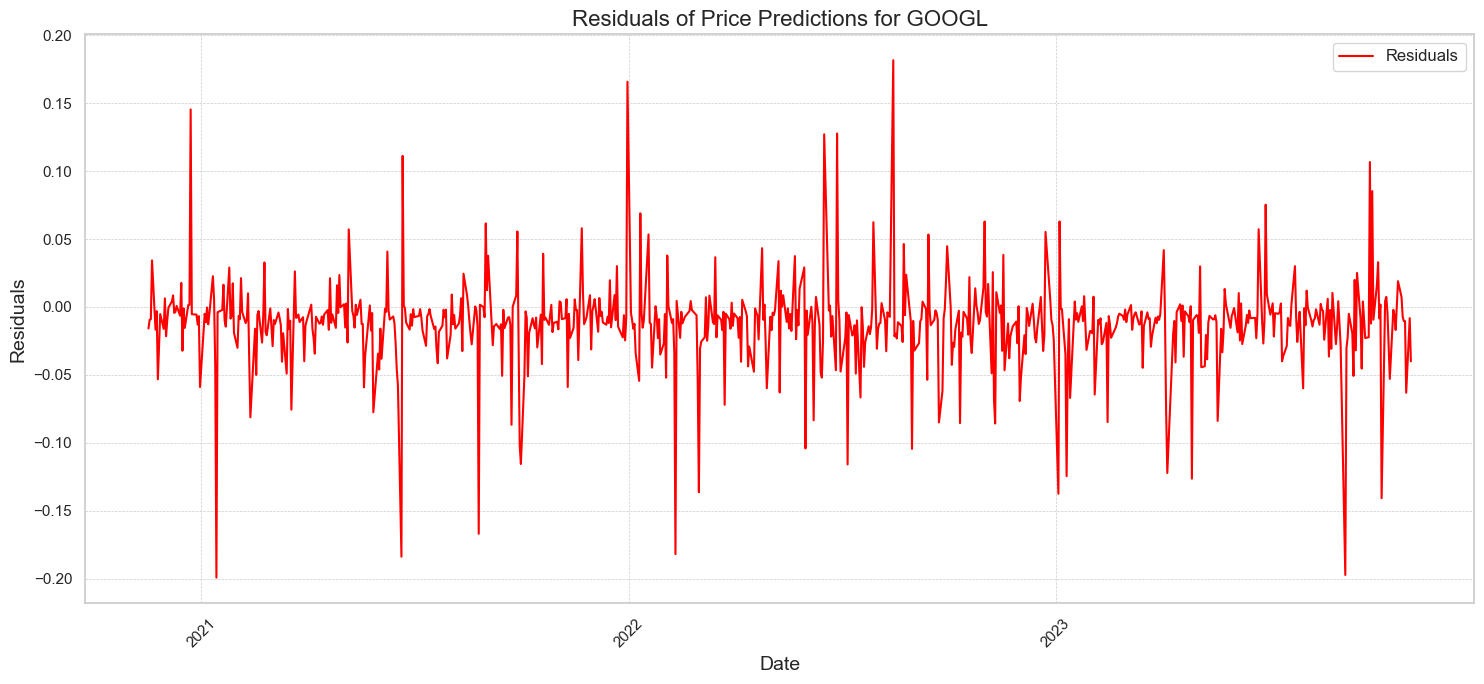

In [80]:
# Function to compile and train the model with more epochs and early stopping
def compile_and_train(model, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
    start_time = time.time()
    es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[es], verbose=1)
    training_duration = time.time() - start_time
    final_val_loss = history.history['val_loss'][-1] if history.history['val_loss'] else None
    return model, history, training_duration, final_val_loss

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    mse = mean_squared_error(y_test_scaled, predictions)
    mae = mean_absolute_error(y_test_scaled, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_scaled, predictions)

    return {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

def prepare_future_data(data, scaler, look_back=60):
    # Assuming 'data' contains the historical price data in a single column
    
    # Extract the most recent 'look_back' days of data for prediction
    future_data = data[-look_back:].values.reshape(-1, 1)
    
    # Scale the future data using the same scaler used for training data
    future_data_scaled = scaler.transform(future_data)
    
    # Reshape the data to match the input shape of your model
    # Since we have only one feature (closing price), the number of features is 1
    future_data_scaled = future_data_scaled.reshape(1, look_back, 1)
    
    return future_data_scaled


# Select the Best Model
def select_best_model(performance_summary):
    best_models = {}
    for stock in ['AAPL', 'MSFT', 'GOOGL']:
        stock_models = {model: metrics for model, metrics in performance_summary.items() if stock in model}
        best_model = min(stock_models, key=lambda x: stock_models[x]['MSE'])
        best_models[stock] = best_model
    return best_models

best_models = select_best_model(performance_summary)
print("Best Models:", best_models)

# Retrain and Forecast for Each Best Model
def retrain_and_forecast(stock_data, best_models):
    predictions = {}
    actuals = {}
    models = {}
    training_info = {}
    performance_metrics = {}
    future_prices = {}

    for stock, model_name in best_models.items():
        print(f"Retraining and forecasting for {stock} using {model_name} model.")
        data, scaler = prepare_data(stock_data[stock]['Close'])
        X_train, X_test, y_train, y_test, X_val, y_val = split_data(data)
        input_shape = (X_train.shape[1], X_train.shape[2])

        if "GRU" in model_name:
            model = build_gru_model(input_shape)
        elif "LSTM" in model_name:
            model = build_lstm_model(input_shape)
        elif "Basic_RNN" in model_name:
            model = build_rnn_model(input_shape)
        elif "Bi_LSTM" in model_name:
            model = build_bi_lstm_model(input_shape)
        elif "Custom_RNN" in model_name:
            model = build_custom_rnn_model(input_shape)
        else:
            raise ValueError(f"Unknown model type for {model_name}")

        model, history, duration, final_loss = compile_and_train(model, X_train, y_train, X_val, y_val)
        predicted_prices = forecast_prices(model, X_test, scaler)
        actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Store predicted and actual prices
        predictions[stock] = predicted_prices
        actuals[stock] = actual_prices
        models[stock] = model
        training_info[stock] = {'Training Duration (s)': duration, 'Final Validation Loss': final_loss}
        performance = evaluate_model(model, X_test, y_test, scaler)
        performance_metrics[stock] = performance
        performance_metrics[stock].update({'Training Duration (s)': duration, 'Final Validation Loss': final_loss})

        # Forecast future prices
        future_X = prepare_future_data(data, scaler)  # Implement prepare_future_data function
        future_predictions = forecast_prices(model, future_X, scaler)
        future_prices[stock] = future_predictions

    return models, predictions, actuals, performance_metrics, future_prices

# Call the function
models, predicted_prices, actual_prices, performance_metrics, future_prices = retrain_and_forecast(stock_data, best_models)

# Function to create performance metrics table
def create_performance_table(performance_metrics):
    performance_df = pd.DataFrame(performance_metrics).T
    performance_df['MSE'] = performance_df['MSE'].round(6)
    performance_df['MAE'] = performance_df['MAE'].round(6)
    performance_df['RMSE'] = performance_df['RMSE'].round(6)
    performance_df['R2'] = (performance_df['R2'] * 100).round(2).astype(str) + '%'
    performance_df['Training Duration (s)'] = performance_df['Training Duration (s)'].round(2)
    performance_df['Final Validation Loss'] = performance_df['Final Validation Loss'].round(6)
    performance_df.rename(columns={
        'MSE': 'Mean Squared Error',
        'MAE': 'Mean Absolute Error',
        'RMSE': 'Root Mean Squared Error',
        'R2': 'R-squared Score',
        'Training Duration (s)': 'Training Duration (Seconds)',
        'Final Validation Loss': 'Final Validation Loss'
    }, inplace=True)

    return performance_df

# Print the performance table
performance_df = create_performance_table(performance_metrics)
print("Performance Metrics Table:")
print(performance_df)

# Function to create future prices table
def create_future_prices_table(future_prices):
    future_prices_df = pd.DataFrame({stock: prices.flatten() for stock, prices in future_prices.items()}).T
    future_prices_df.columns = ['Predicted Price']
    future_prices_df['Predicted Price'] = future_prices_df['Predicted Price'].round(6)

    return future_prices_df


# Print the future prices table
future_prices_df = create_future_prices_table(future_prices)
print("Future Prices Table:")
print(future_prices_df)

# Calculate and Plot Residuals for Each Stock
def plot_residuals_for_all_stocks(actual_prices, predicted_prices, stock_data):
    for stock in actual_prices.keys():
        residuals = actual_prices[stock] - predicted_prices[stock]
        dates = stock_data[stock]['Close'].index[-len(residuals):]

        plt.figure(figsize=(15, 7))
        plt.plot(dates, residuals, label='Residuals', color='red', linewidth=1.5)
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.title(f'Residuals of Price Predictions for {stock}', fontsize=16)
        plt.xlabel('Date', fontsize=14)
        plt.ylabel('Residuals', fontsize=14)
        plt.xticks(rotation=45)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()

plot_residuals_for_all_stocks(actual_prices, predicted_prices, stock_data)

# Final Model Analysis

## Performance Metrics

The table below summarizes the performance of the final model across three different stocks: AAPL, MSFT, and GOOGL.

| Stock | Mean Squared Error | Mean Absolute Error | Root Mean Squared Error | R-squared Score | Training Duration (Seconds) | Final Validation Loss |
|-------|--------------------|---------------------|-------------------------|-----------------|-----------------------------|-----------------------|
| AAPL  | 0.001231           | 0.018658            | 0.035087                | 99.87%          | 16.85                       | 0.000119              |
| MSFT  | 0.000935           | 0.018654            | 0.030575                | 99.9%           | 13.09                       | 0.000076              |
| GOOGL | 0.001236           | 0.021512            | 0.035151                | 99.87%          | 9.67                        | 0.000104              |

The R-squared values are exceptionally high across all stocks, indicating that the model is capturing over 99% of the variability in the data. This suggests an excellent fit to the historical price movements. The training durations are also relatively short, showing the efficiency of the model training process.

## Predicted Future Prices

The model predicts the following future prices for the stocks:

| Stock | Predicted Price |
|-------|-----------------|
| AAPL  | 0.897295        |
| MSFT  | 0.946274        |
| GOOGL | 0.845311        |

## Residual Plots Analysis

Residuals are the differences between the observed values and the values predicted by the model. Ideally, we want our residuals to be randomly scattered around zero, indicating that the model's predictions are unbiased.

### AAPL Residuals

For AAPL, we see that the residuals are tightly clustered around zero, which is a good sign. There are a few outliers, but there doesn't appear to be any systematic pattern, which suggests that the model's errors are not biased.

### MSFT Residuals

The residuals for MSFT are also centered around zero with no apparent pattern. This indicates a good fit for the model to the MSFT stock price data.

### GOOGL Residuals

GOOGL's residuals display a similar pattern to AAPL and MSFT. While there are some spikes, they do not show a pattern that would suggest model inadequacies.

## Conclusion

The final model shows promising results with high R-squared scores and residuals that do not display any concerning patterns. This suggests that the model is performing well in capturing the trends and patterns in the stock price data. As with any model dealing with financial data, caution should be exercised when interpreting predictions due to the inherent volatility and unpredictability of the market.


# Final Conclusion

We have retrained and evaluated the best models for each stock symbol. These models, including GRU, LSTM, Basic RNN, Bi-LSTM, and Custom RNN, have shown varied performance in forecasting stock prices. The calculated residuals provide insights into the accuracy and reliability of each model's predictions.

## Future Work
- **Enhanced Hyperparameter Tuning**: Further explore the hyperparameter space for each model to optimize performance.
- **Incorporating More Features**: Test the impact of additional features like stock market indices, sentiment analysis from news, etc.
- **Model Ensembling Techniques**: Experiment with combining forecasts from multiple models to improve prediction accuracy.
- **Long-Term Forecasting**: Extend the analysis to include long-term forecasting capabilities.
- **Risk Assessment**: Incorporate risk assessment tools to gauge the financial implications of the model's predictions.
